# AI Assignment 2 - Computers Can Do Art!

### About the art
* This program produces a pixel art out of the input image (512 x 512)
* The 'pixel' in the pixel art is 32 x 32 pixels
* Consequently, each output image is 16 x 16 'pixels'

### Some constants for the program's use

In [7]:
input_image_name = 'planet.jpg'
perfect_colour_num = 10
population_size = 6
epoch_number = 20000

### Lib imports & Image loading

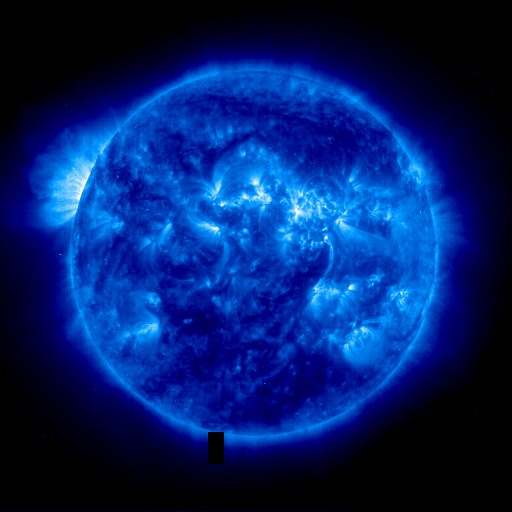

In [2]:
from PIL import Image
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

input_image = Image.open(input_image_name, 'r')
input_array = np.asarray(input_image)
display.display(input_image, 'RGB')

### Fitness function
The function splits two images into three channesl (red, green and blue) and compares the euclidian distance using the values of the channels for each pixel of the two images.

In [3]:
import math

'''
fitness = (1 - (distance between images/max distance))
perfect colour choice can be set above
takes two images as arrays
produces values 0 to 1
'''
def fitness(population_img):
    distance = 0
    distance = np.linalg.norm(input_array - population_img)
    colours = []
    for i in range(16):
        for j in range(16):
            if list(population_img[i * 32][j * 32]) not in list(map(list,colours)):
                colours += [population_img[i * 32][j * 32]]
    colour_choice = 1 - abs(perfect_colour_num - len(colours))/256
    result = -distance / ( 1 + colour_choice)
    return result

### Crossover & Mutation

In [4]:
import random

'''
takes two images (arrays)
produces two images (arrays) in form [result_1, result_2]
'''
def crossover(first_img, second_img):
    #     half of the pixels of the two images are swpped, the pixels are chosen randomly
    swap_cells = random.sample(population = [(j, i) for j in range(16) for i in range(16)], k = 128)
    first_child = np.copy(first_img)
    second_child = np.copy(second_img)
    #     colouring
    for cell in swap_cells:
        for i in range(32):
            for j in range(32):
                first_child[cell[0] * 32 + i][cell[1] * 32 + j] = second_img[cell[0] * 32, cell[1] * 32]
        for i in range(32):
            for j in range(32):
                second_child[cell[0] * 32 + i, cell[1] * 32 + j] = first_img[cell[0] * 32, cell[1] * 32]
    return [first_child, second_child]

'''
takes one image (array)
produces one image (array)
'''
def mutation(img):
    #     random number of mutated pixels
    mutation_num = np.random.randint(0, high = 256, size = 1)[0]
    #     the pixels themselves are also chosen randomly
    mutated_cells = random.sample(population = [(j, i) for j in range(16) for i in range(16)], k = mutation_num)
    outp_img = np.copy(img)
    mutation_kind = np.random.randint(0, 2)
    if mutation_kind is 0:
    #   color first mutated cell with random color
        color = np.random.randint(0, 255, size=3, dtype=np.uint8)
        if len(mutated_cells) > 0:
            for i in range(32):
                for j in range(32):
                    outp_img[mutated_cells[0][0] * 32 + i, mutated_cells[0][1] * 32 + j] = color
    elif mutation_kind is 1:
    #   color each mutated cell with one color picked from the picture
        from_cell = random.choice([(j, i) for j in range(16) for i in range(16)])
        color = img[from_cell[0], from_cell[1]]
        for cell in mutated_cells:
            for i in range(32):
                for j in range(32):
                    outp_img[cell[0] * 32 + i, cell[1] * 32 + j] = color
    else:
    #   color each mutated cell with one color picked randomly
        color = np.random.randint(0, 255, size=3, dtype=np.uint8)
        for cell in mutated_cells:
            for i in range(32):
                for j in range(32):
                    outp_img[cell[0] * 32 + i, cell[1] * 32 + j] = color
    return outp_img

### Population generation

In [5]:
def generate_initial_population():
    population = []
    img = np.ones((512,512,3), dtype=np.uint8) * 255
    for n in range(population_size):
        population.append(np.copy(img))
    return population

def generate_population(past_population):
    new_population = []
    #     mutation
    for m in past_population:
        while True:
            i = mutation(m)
            if (fitness(i) > fitness(m)):
                break
        new_population += [np.copy(i)]
    print("Mutations are done")
    #     crossover
    crossover_pairs = random.sample(population = [(j, i) for j in range(population_size) 
                                                  for i in range(population_size)], 
                                   k = len(new_population) * 2)
    for pair in crossover_pairs:
        i, j = crossover(new_population[pair[0]], new_population[pair[1]])
        new_population += [np.copy(i), np.copy(j)]
    print("Crossovers are done")
    #     calculate fitness
    new_population.sort(key = fitness, reverse = True)
    return new_population[:population_size]

### Evolution

[-37531.84414090387, -37531.84414090387, -37531.84414090387, -37531.84414090387, -37531.84414090387, -37531.84414090387]


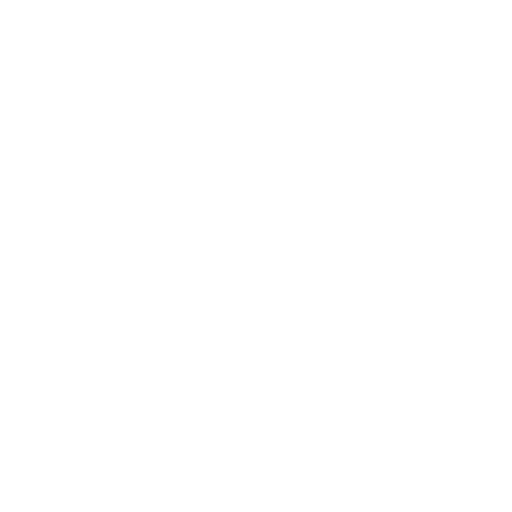

Computation for population 0
Mutations are done
Crossovers are done
Fitness for the first element is -37323.9144116122
Computation finished for population 0


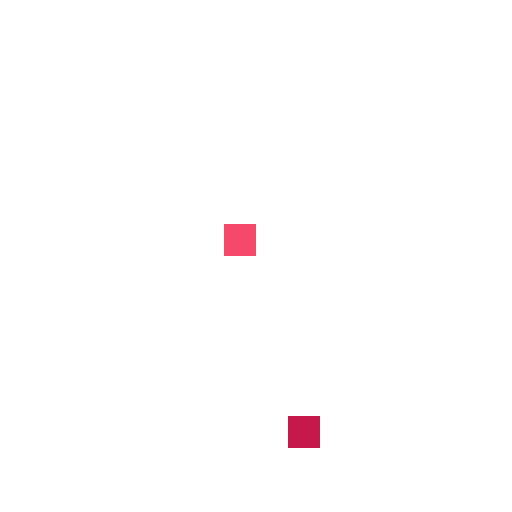

Computation for population 1
Mutations are done
Crossovers are done
Fitness for the first element is -37017.584844808574
Computation finished for population 1


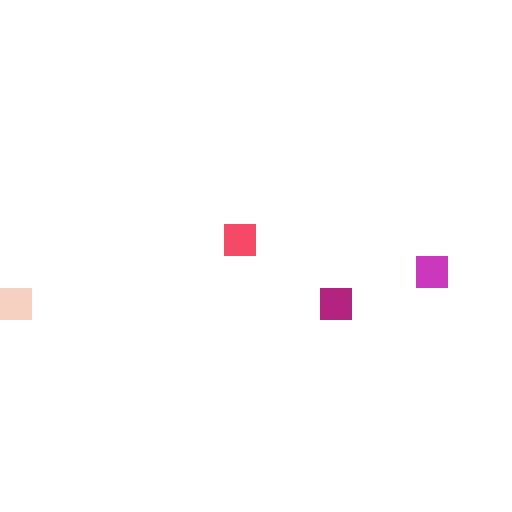

Computation for population 2
Mutations are done
Crossovers are done
Fitness for the first element is -36954.353020312155
Computation finished for population 2


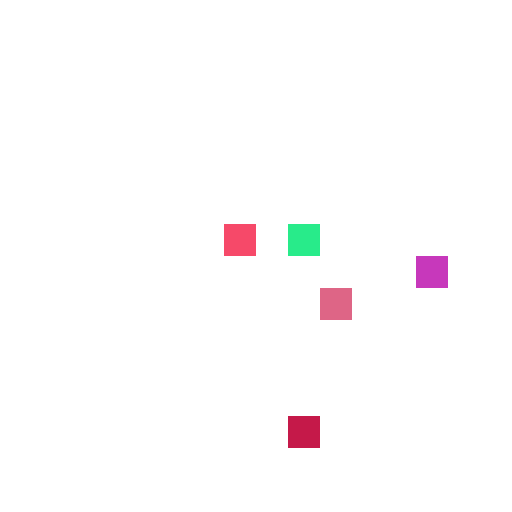

Computation for population 3
Mutations are done
Crossovers are done
Fitness for the first element is -36837.38206340793
Computation finished for population 3


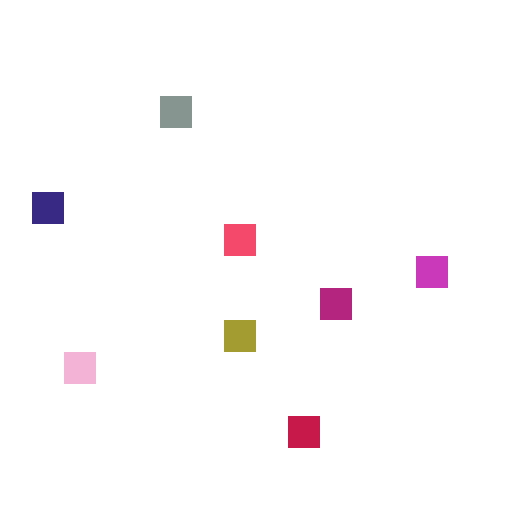

Computation for population 4
Mutations are done
Crossovers are done
Fitness for the first element is -36600.37411837045
Computation finished for population 4


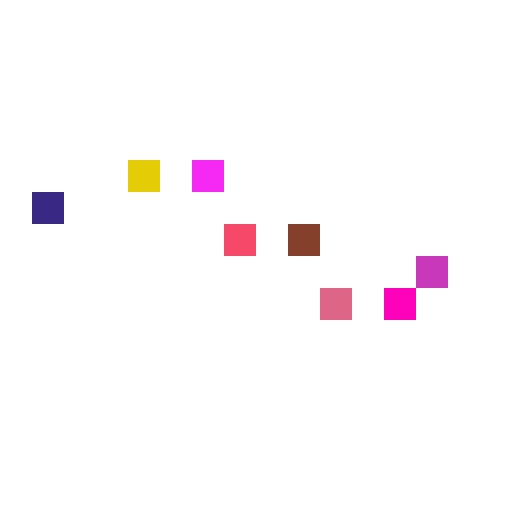

Computation for population 5
Mutations are done
Crossovers are done
Fitness for the first element is -36370.36411877974
Computation finished for population 5


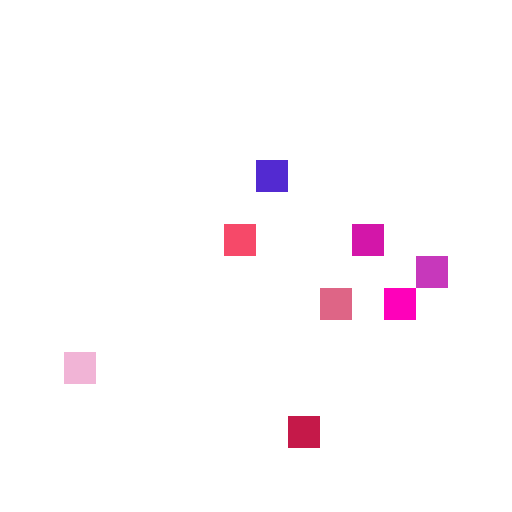

Computation for population 6
Mutations are done
Crossovers are done
Fitness for the first element is -36282.8167594524
Computation finished for population 6


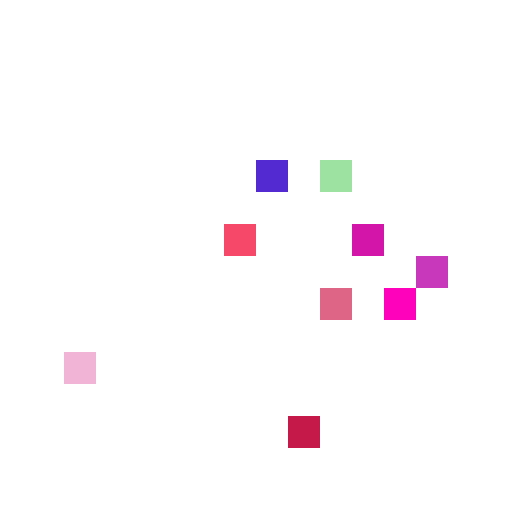

Computation for population 7
Mutations are done
Crossovers are done
Fitness for the first element is -36057.617881825856
Computation finished for population 7


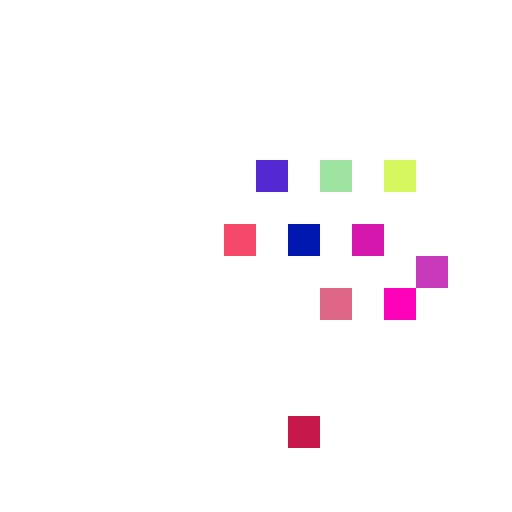

Computation for population 8
Mutations are done
Crossovers are done
Fitness for the first element is -35916.20586123133
Computation finished for population 8


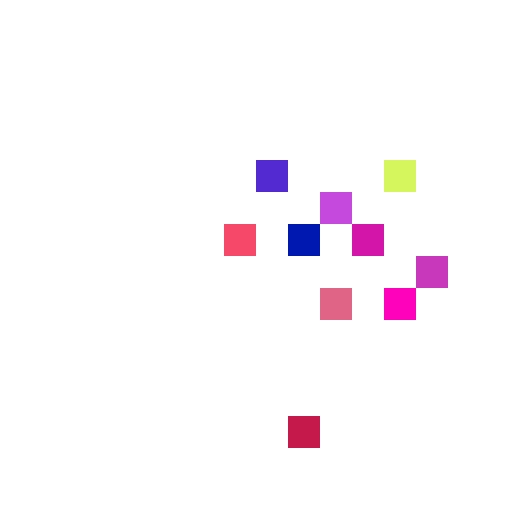

Computation for population 9
Mutations are done
Crossovers are done
Fitness for the first element is -35810.03552776791
Computation finished for population 9


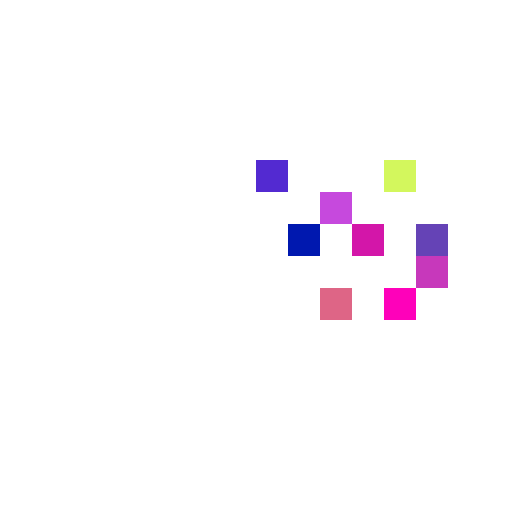

Computation for population 10
Mutations are done
Crossovers are done
Fitness for the first element is -35687.73552931848
Computation finished for population 10


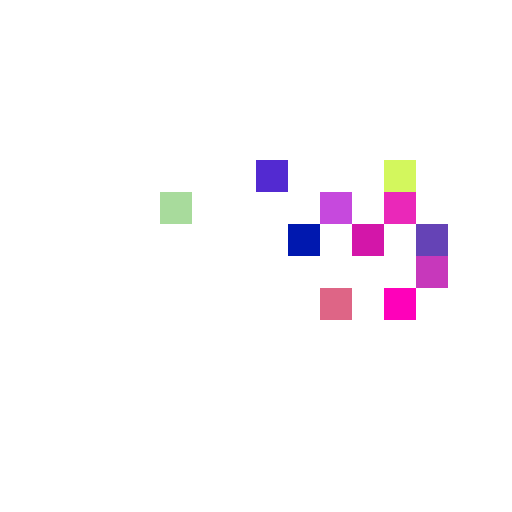

Computation for population 11
Mutations are done
Crossovers are done
Fitness for the first element is -35661.75365480084
Computation finished for population 11


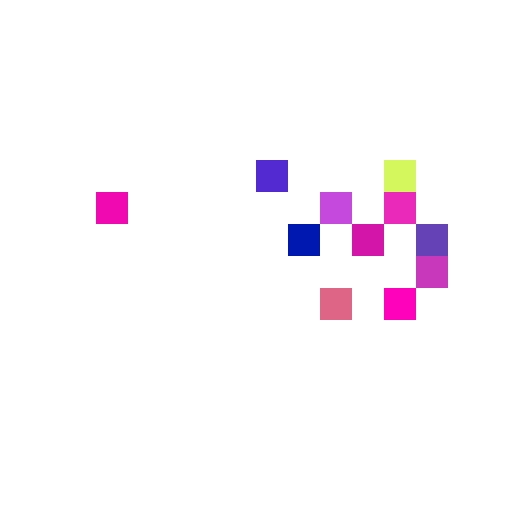

Computation for population 12
Mutations are done
Crossovers are done
Fitness for the first element is -35569.90491387166
Computation finished for population 12


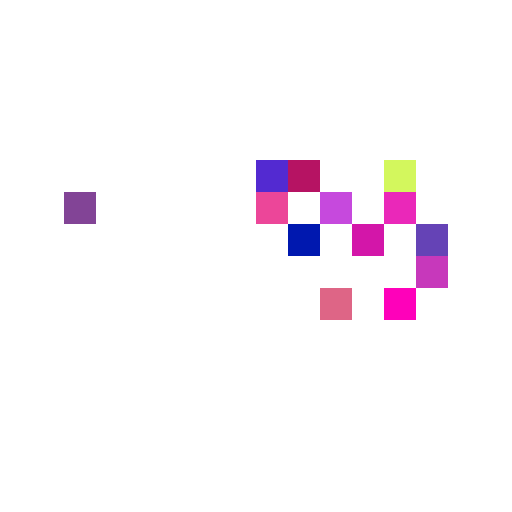

Computation for population 13
Mutations are done
Crossovers are done
Fitness for the first element is -35379.2031680602
Computation finished for population 13


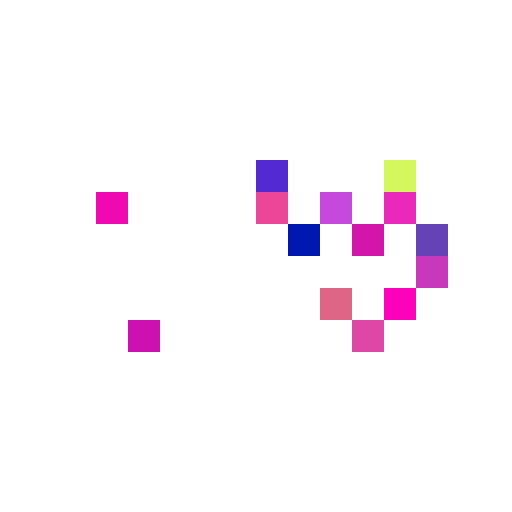

Computation for population 14
Mutations are done
Crossovers are done
Fitness for the first element is -35276.28013473241
Computation finished for population 14


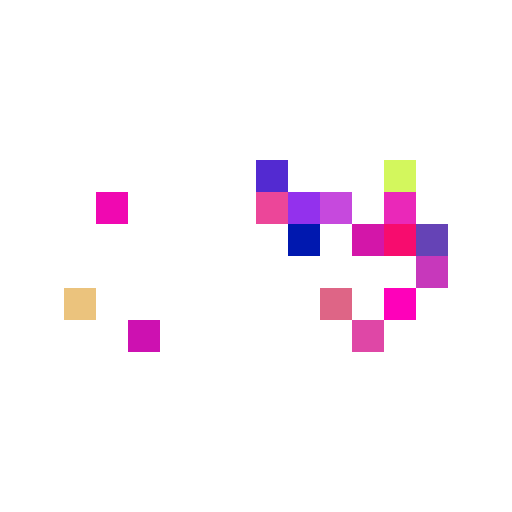

Computation for population 15
Mutations are done
Crossovers are done
Fitness for the first element is -35152.01999198275
Computation finished for population 15


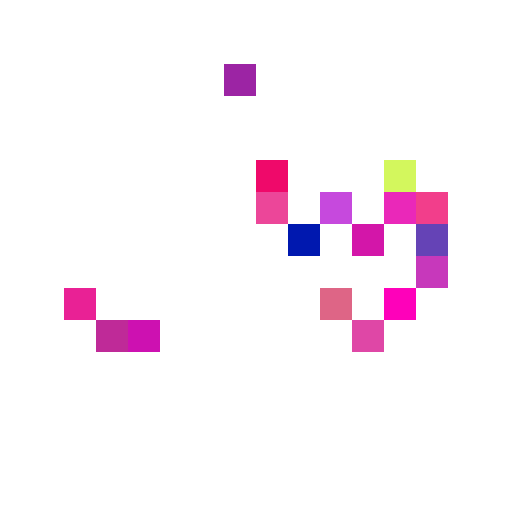

Computation for population 16
Mutations are done
Crossovers are done
Fitness for the first element is -35102.63598589713
Computation finished for population 16


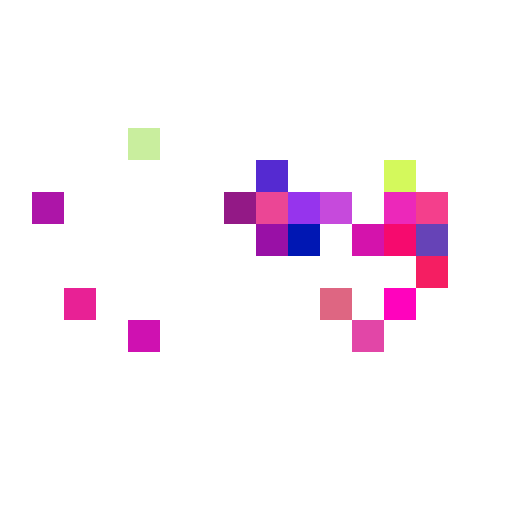

Computation for population 17
Mutations are done
Crossovers are done
Fitness for the first element is -35017.04379780733
Computation finished for population 17


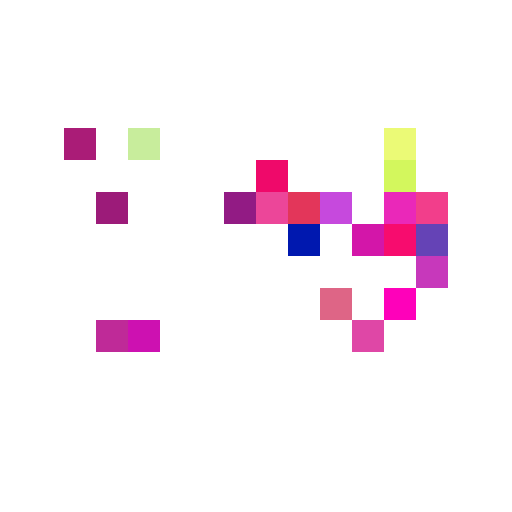

Computation for population 18
Mutations are done
Crossovers are done
Fitness for the first element is -34796.320308765076
Computation finished for population 18


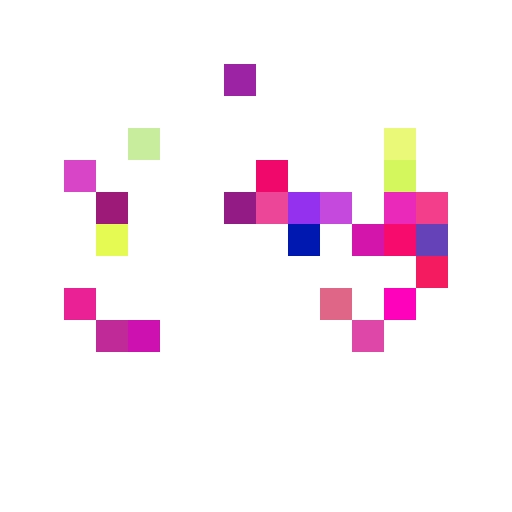

Computation for population 19
Mutations are done
Crossovers are done
Fitness for the first element is -34712.934407947665
Computation finished for population 19


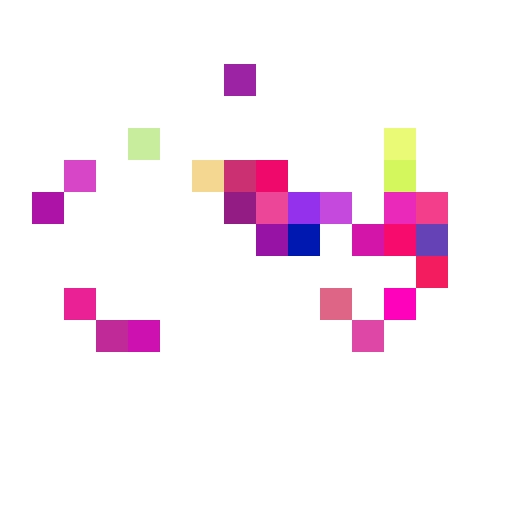

Computation for population 20
Mutations are done
Crossovers are done
Fitness for the first element is -34439.63760807183
Computation finished for population 20


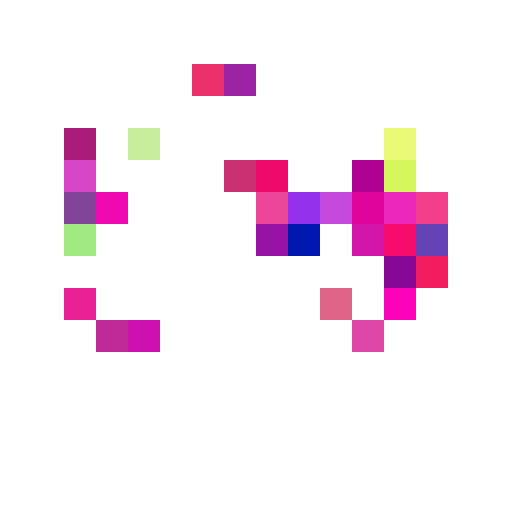

Computation for population 21
Mutations are done
Crossovers are done
Fitness for the first element is -34381.101727077206
Computation finished for population 21


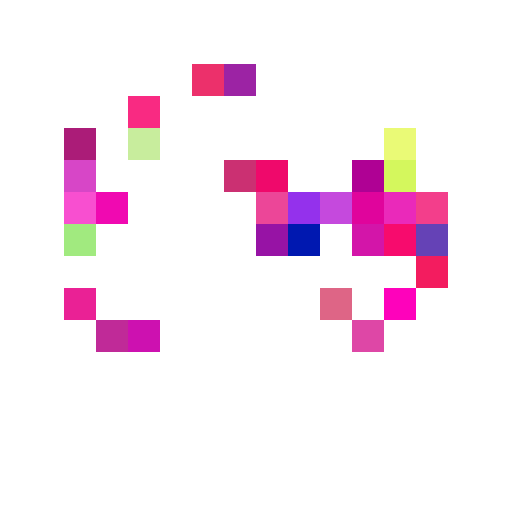

Computation for population 22
Mutations are done
Crossovers are done
Fitness for the first element is -34316.680450516054
Computation finished for population 22


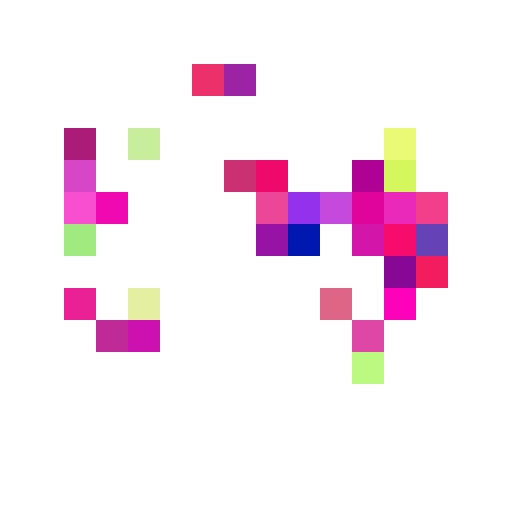

Computation for population 23
Mutations are done
Crossovers are done
Fitness for the first element is -34116.74796476072
Computation finished for population 23


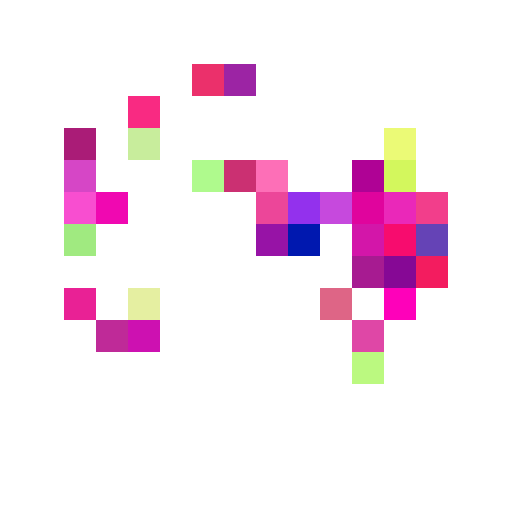

Computation for population 24
Mutations are done
Crossovers are done
Fitness for the first element is -34077.66986902029
Computation finished for population 24


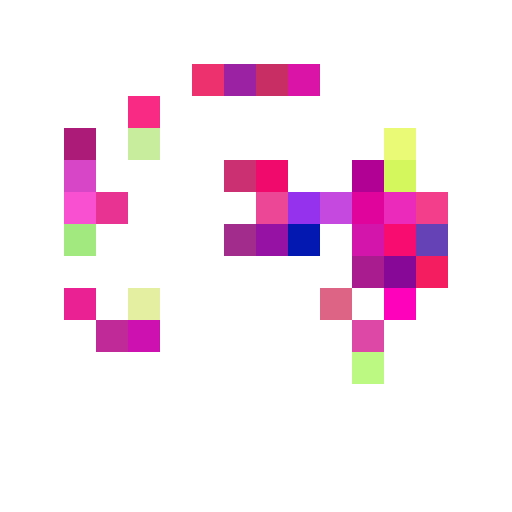

Computation for population 25
Mutations are done
Crossovers are done
Fitness for the first element is -34028.45200749906
Computation finished for population 25


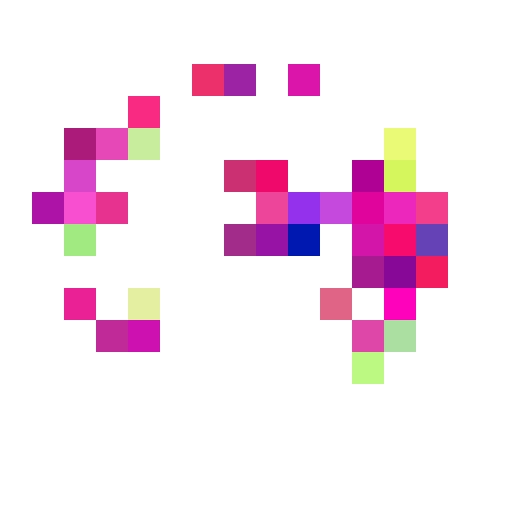

Computation for population 26
Mutations are done
Crossovers are done
Fitness for the first element is -33790.46553755134
Computation finished for population 26


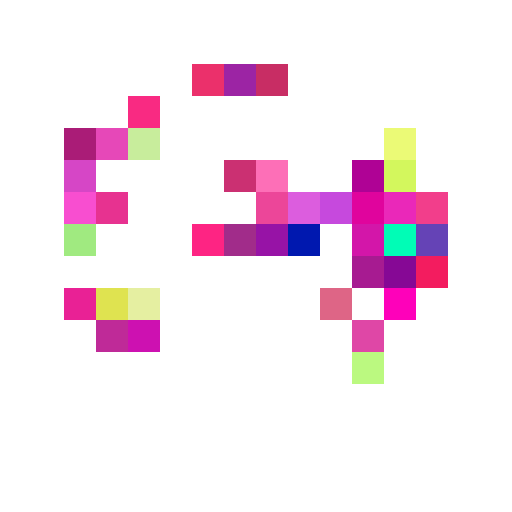

Computation for population 27
Mutations are done
Crossovers are done
Fitness for the first element is -33597.0792796628
Computation finished for population 27


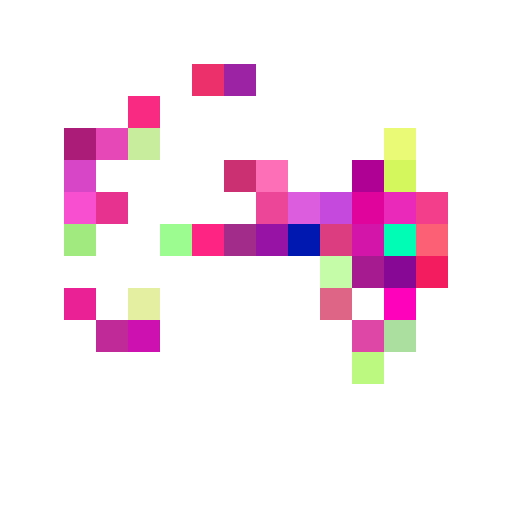

Computation for population 28
Mutations are done
Crossovers are done
Fitness for the first element is -33517.065242363926
Computation finished for population 28


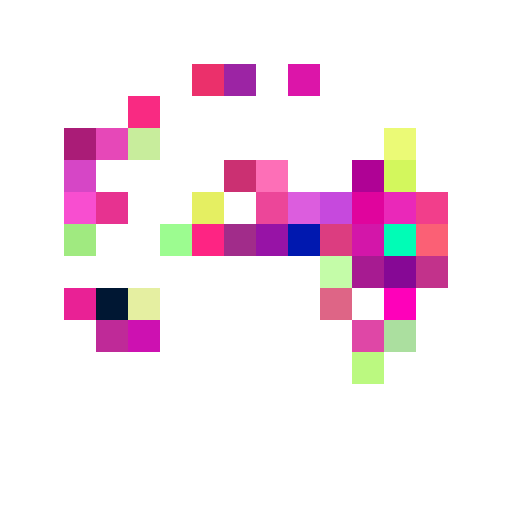

Computation for population 29
Mutations are done
Crossovers are done
Fitness for the first element is -33437.95865190197
Computation finished for population 29


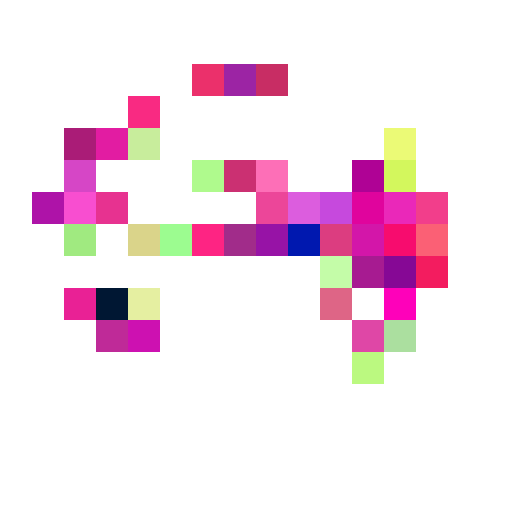

Computation for population 30
Mutations are done
Crossovers are done
Fitness for the first element is -33355.844338867326
Computation finished for population 30


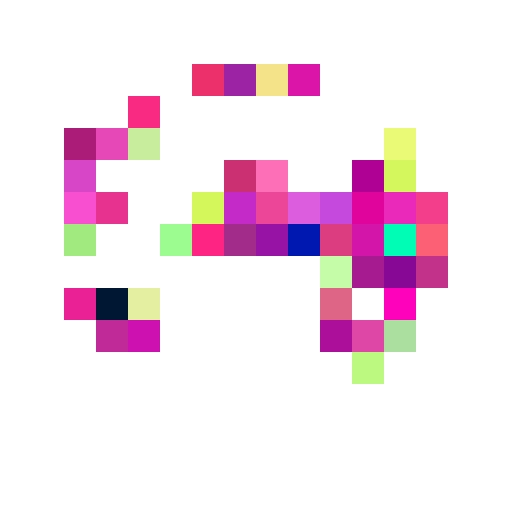

Computation for population 31
Mutations are done
Crossovers are done
Fitness for the first element is -33237.62823122891
Computation finished for population 31


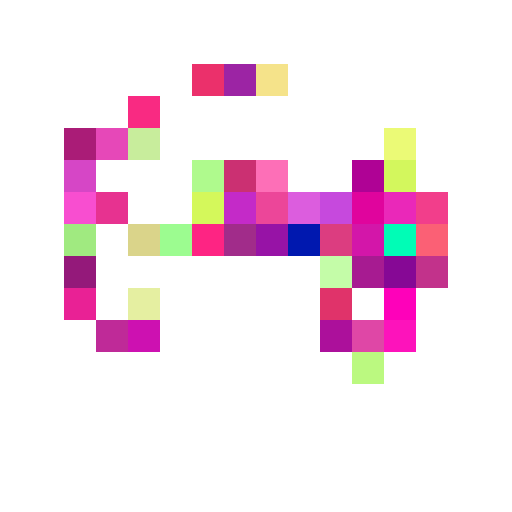

Computation for population 32
Mutations are done
Crossovers are done
Fitness for the first element is -33158.02191991884
Computation finished for population 32


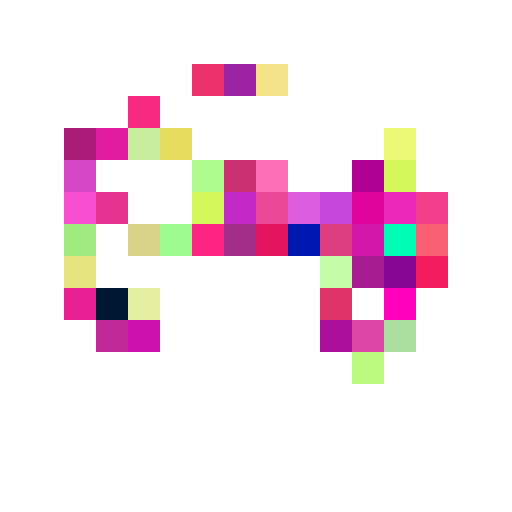

Computation for population 33
Mutations are done
Crossovers are done
Fitness for the first element is -33015.16965476665
Computation finished for population 33


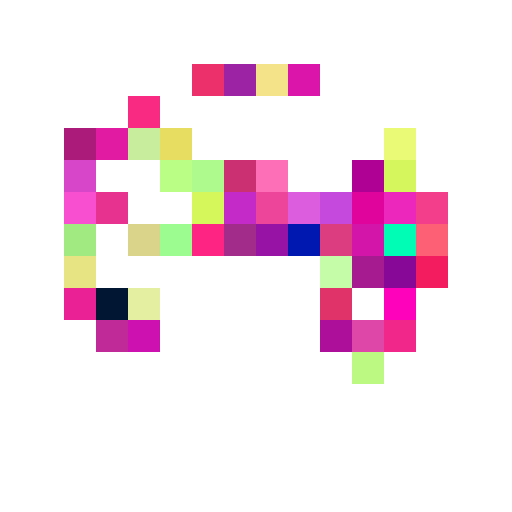

Computation for population 34
Mutations are done
Crossovers are done
Fitness for the first element is -32937.04001378228
Computation finished for population 34


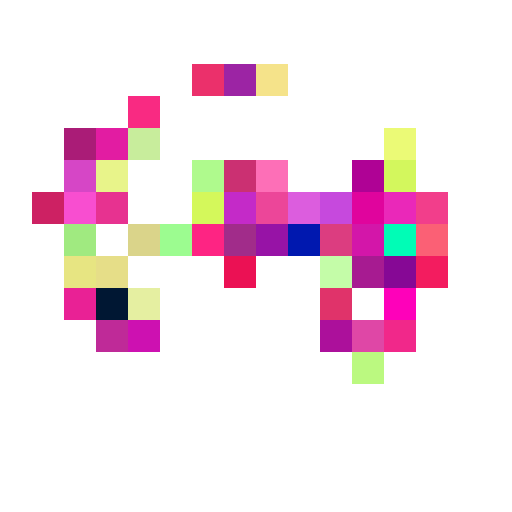

Computation for population 35
Mutations are done
Crossovers are done
Fitness for the first element is -32857.72285979775
Computation finished for population 35


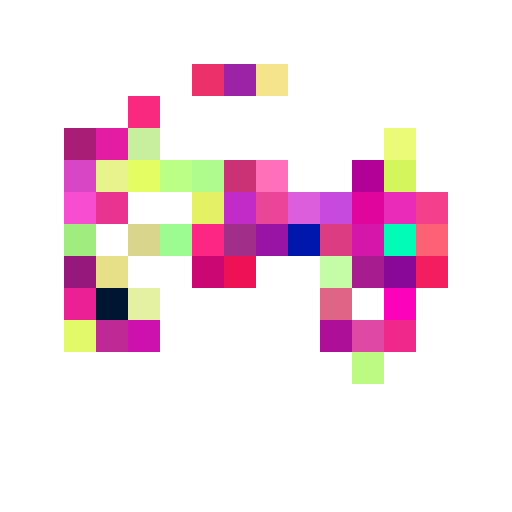

Computation for population 36
Mutations are done
Crossovers are done
Fitness for the first element is -32756.176246144376
Computation finished for population 36


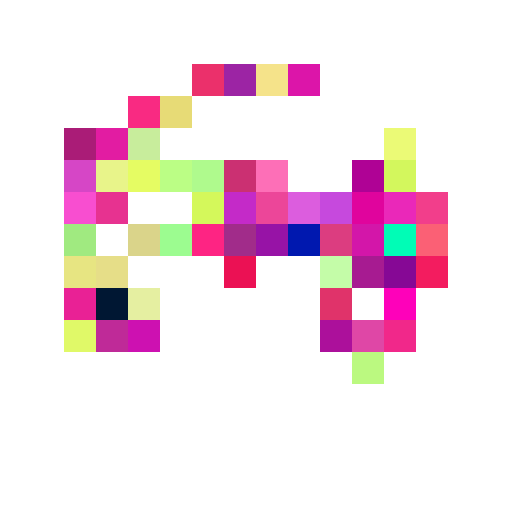

Computation for population 37
Mutations are done
Crossovers are done
Fitness for the first element is -32710.847900284378
Computation finished for population 37


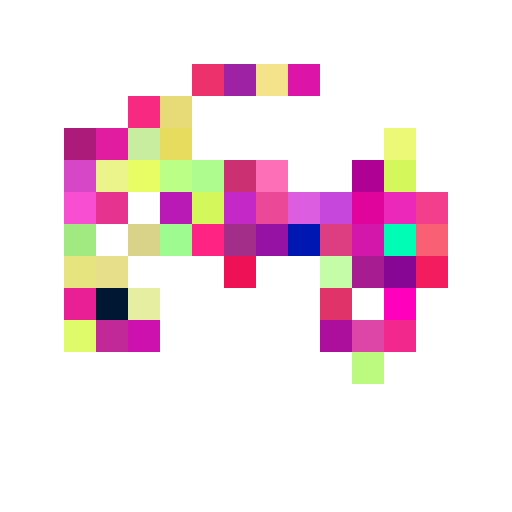

Computation for population 38
Mutations are done
Crossovers are done
Fitness for the first element is -32666.402961677377
Computation finished for population 38


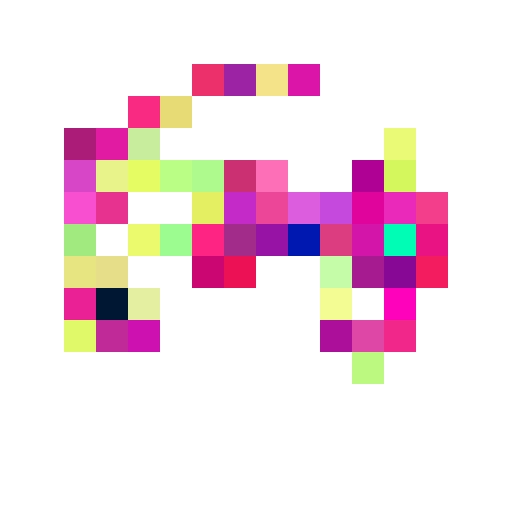

Computation for population 39
Mutations are done
Crossovers are done
Fitness for the first element is -32615.14037930384
Computation finished for population 39


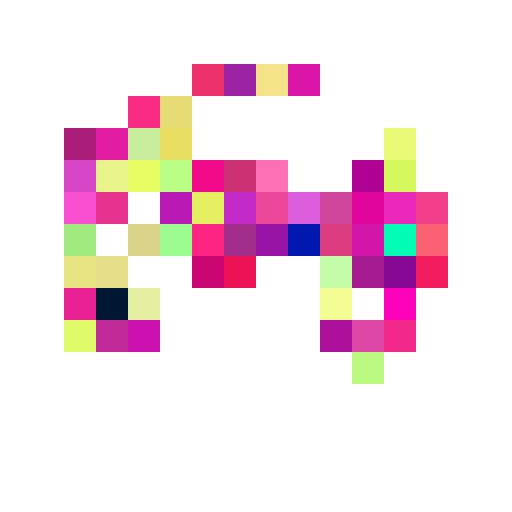

Computation for population 40
Mutations are done
Crossovers are done
Fitness for the first element is -32554.843140602406
Computation finished for population 40


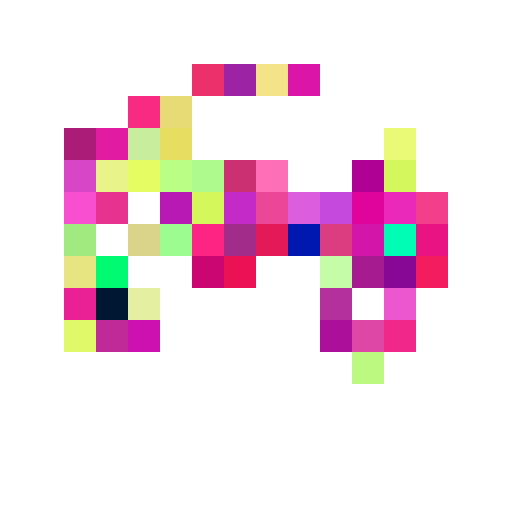

Computation for population 41
Mutations are done
Crossovers are done
Fitness for the first element is -32422.391827084502
Computation finished for population 41


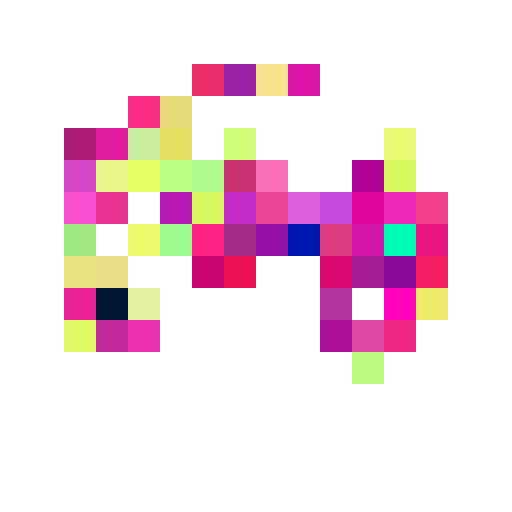

Computation for population 42
Mutations are done
Crossovers are done
Fitness for the first element is -32378.68513054322
Computation finished for population 42


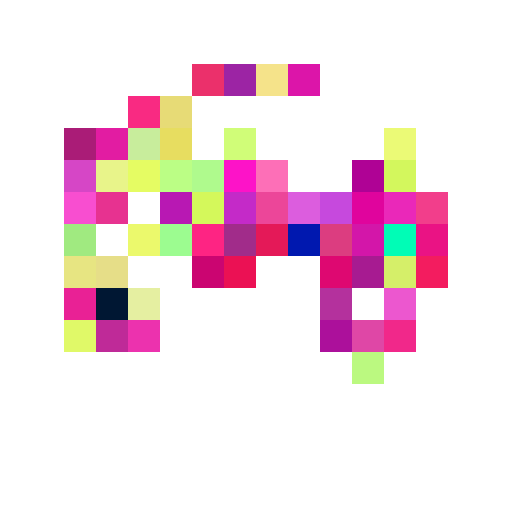

Computation for population 43
Mutations are done
Crossovers are done
Fitness for the first element is -32268.176257354316
Computation finished for population 43


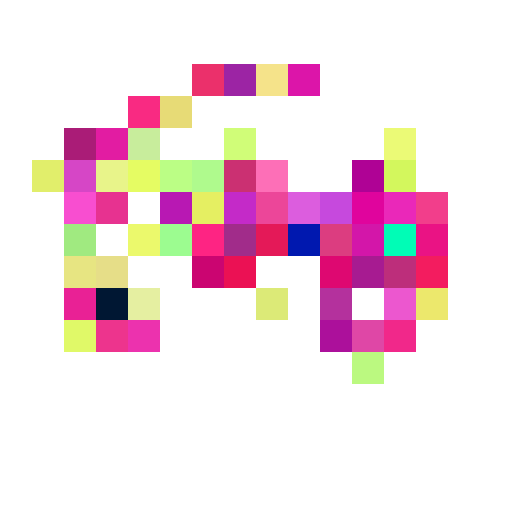

Computation for population 44
Mutations are done
Crossovers are done
Fitness for the first element is -32210.12069858893
Computation finished for population 44


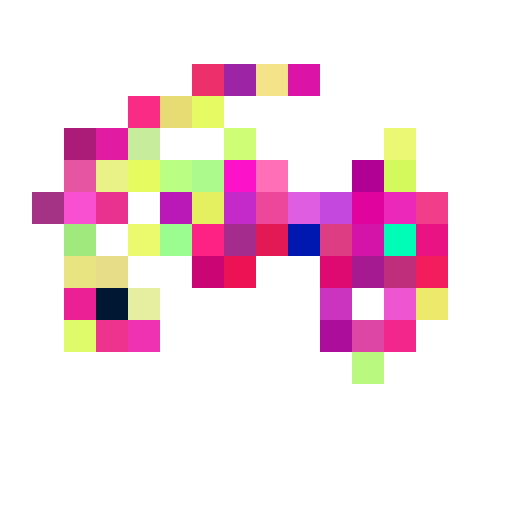

Computation for population 45
Mutations are done
Crossovers are done
Fitness for the first element is -32133.805825440395
Computation finished for population 45


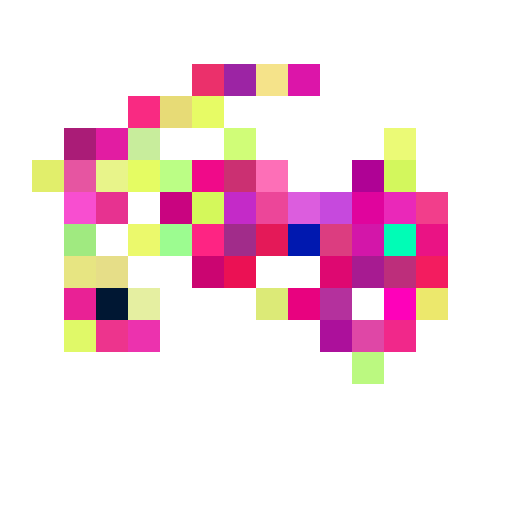

Computation for population 46
Mutations are done
Crossovers are done
Fitness for the first element is -32041.34328839845
Computation finished for population 46


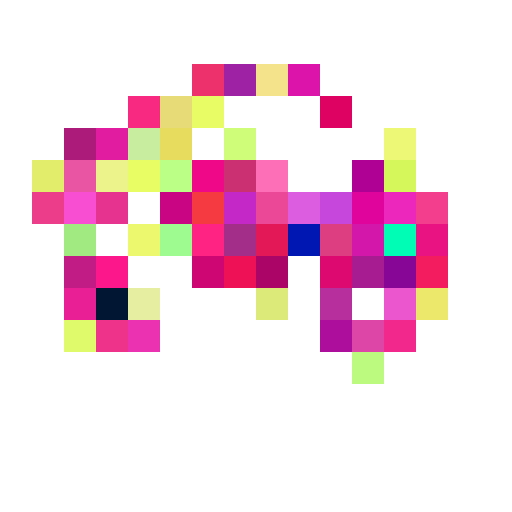

Computation for population 47
Mutations are done
Crossovers are done
Fitness for the first element is -31973.9069743444
Computation finished for population 47


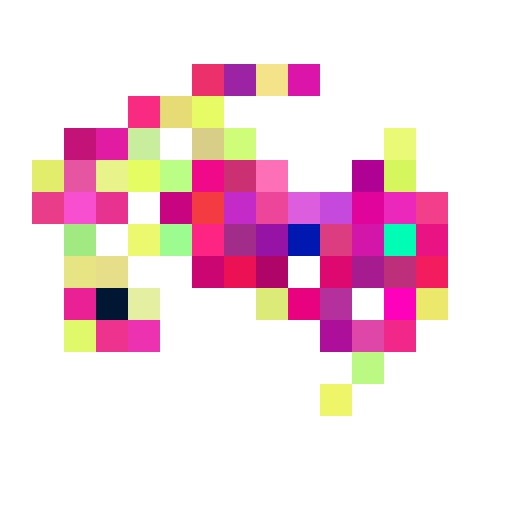

Computation for population 48
Mutations are done
Crossovers are done
Fitness for the first element is -31911.379810305454
Computation finished for population 48


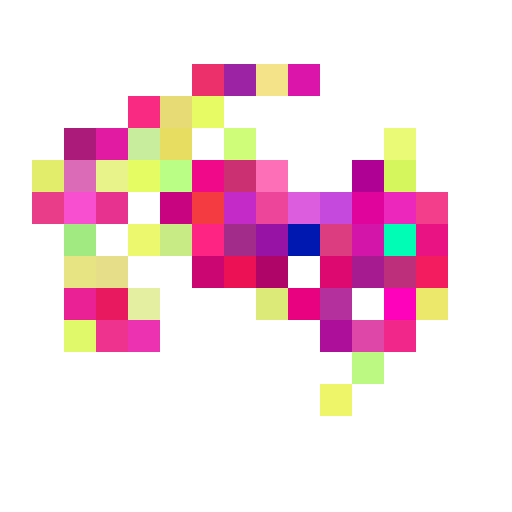

Computation for population 49
Mutations are done
Crossovers are done
Fitness for the first element is -31827.710875777087
Computation finished for population 49


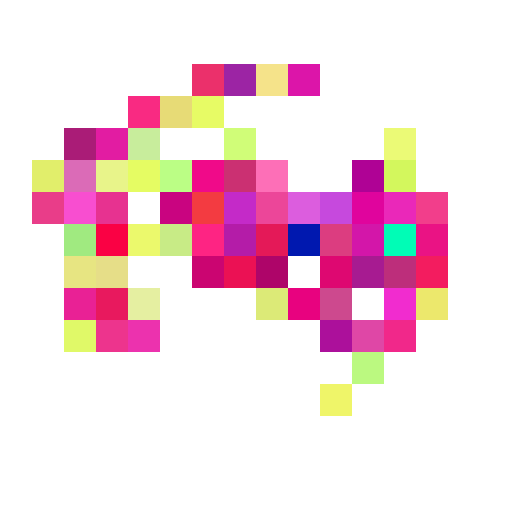

Computation for population 50
Mutations are done
Crossovers are done
Fitness for the first element is -31773.77527858955
Computation finished for population 50


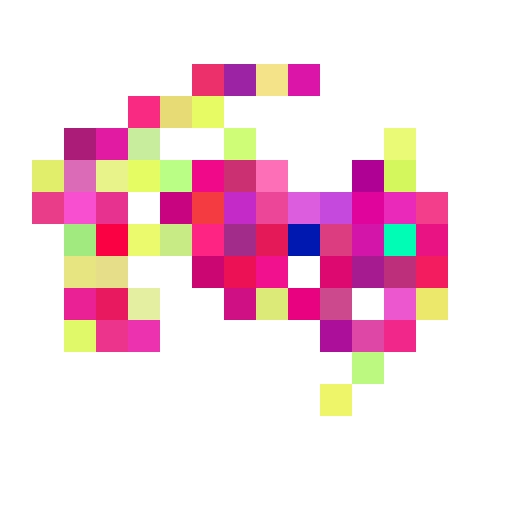

Computation for population 51
Mutations are done
Crossovers are done
Fitness for the first element is -31720.778918300122
Computation finished for population 51


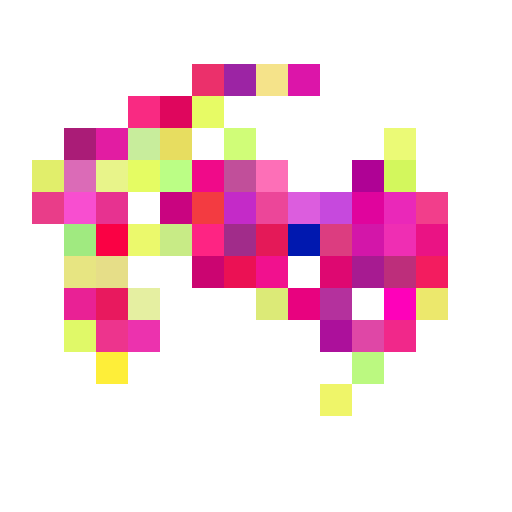

Computation for population 52
Mutations are done
Crossovers are done
Fitness for the first element is -31648.05236227817
Computation finished for population 52


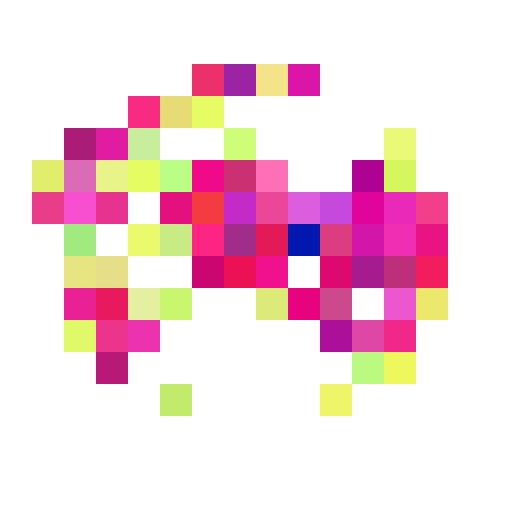

Computation for population 53
Mutations are done
Crossovers are done
Fitness for the first element is -31565.084191489907
Computation finished for population 53


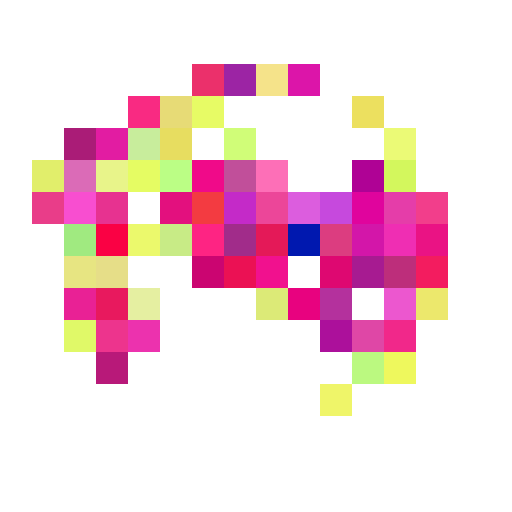

Computation for population 54
Mutations are done
Crossovers are done
Fitness for the first element is -31508.884273756306
Computation finished for population 54


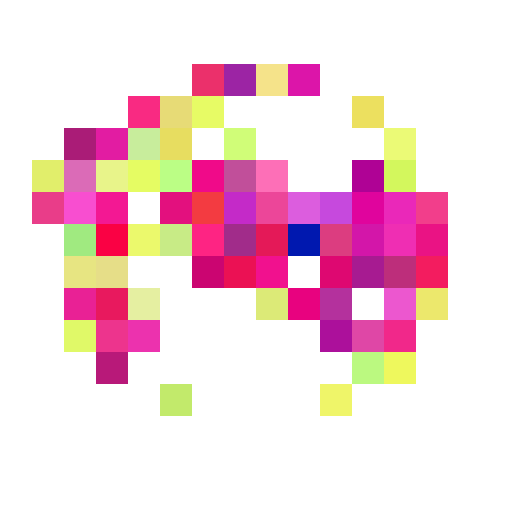

Computation for population 55
Mutations are done
Crossovers are done
Fitness for the first element is -31477.626238780133
Computation finished for population 55


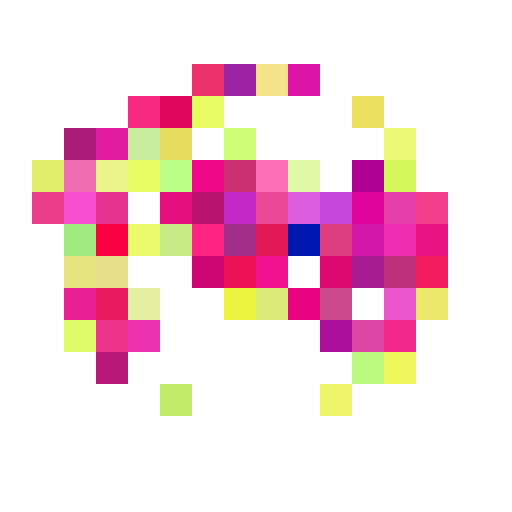

Computation for population 56
Mutations are done
Crossovers are done
Fitness for the first element is -31395.950355185432
Computation finished for population 56


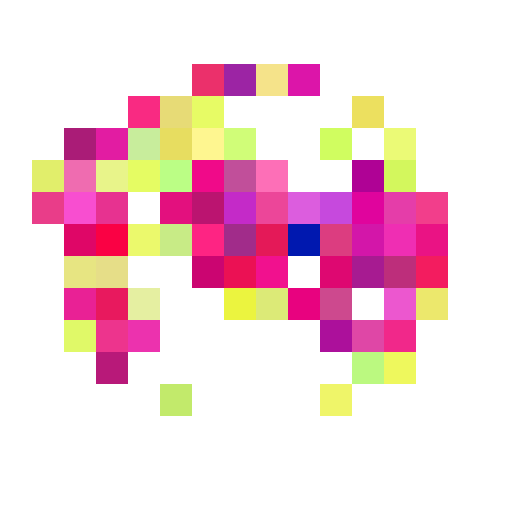

Computation for population 57
Mutations are done
Crossovers are done
Fitness for the first element is -31357.105976628325
Computation finished for population 57


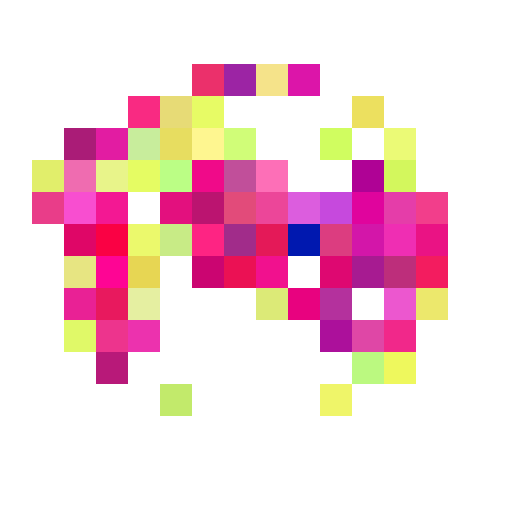

Computation for population 58
Mutations are done
Crossovers are done
Fitness for the first element is -31239.30369739488
Computation finished for population 58


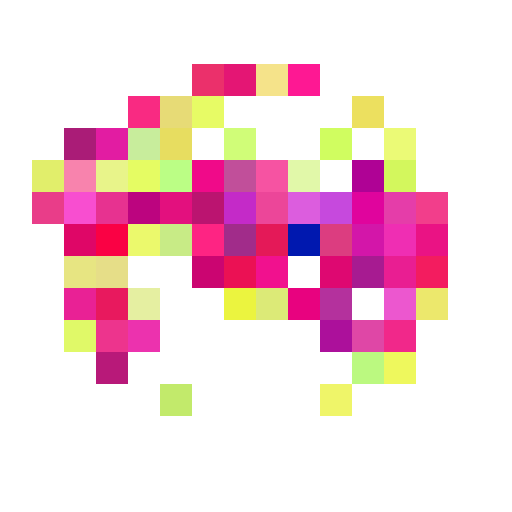

Computation for population 59
Mutations are done
Crossovers are done
Fitness for the first element is -31192.712023905216
Computation finished for population 59


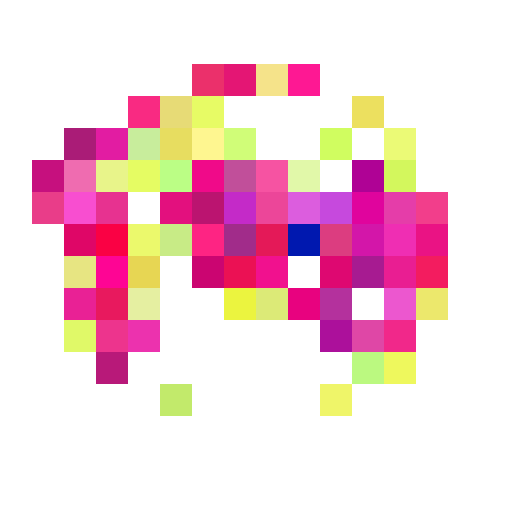

Computation for population 60
Mutations are done
Crossovers are done
Fitness for the first element is -31102.029167586516
Computation finished for population 60


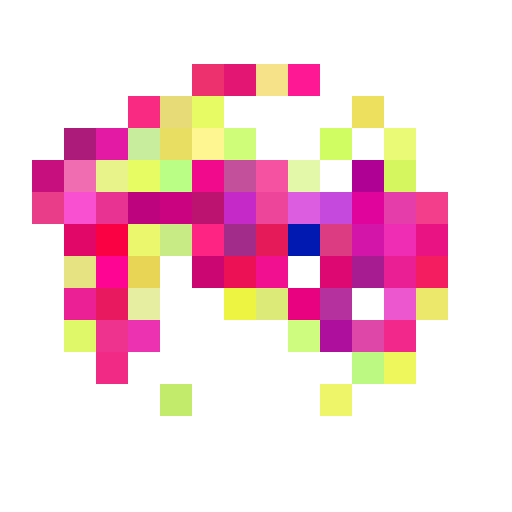

Computation for population 61
Mutations are done
Crossovers are done
Fitness for the first element is -30980.41896692681
Computation finished for population 61


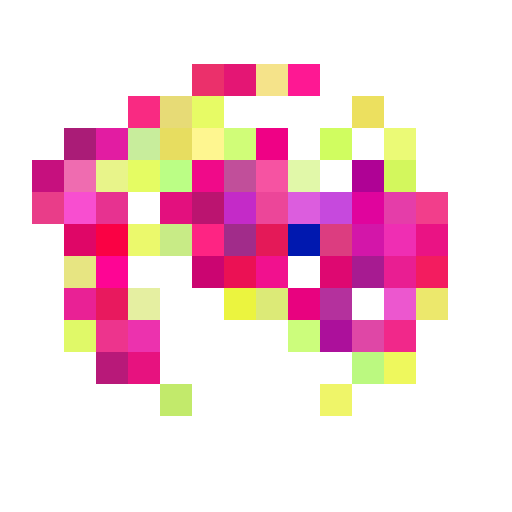

Computation for population 62
Mutations are done
Crossovers are done
Fitness for the first element is -30922.944042568044
Computation finished for population 62


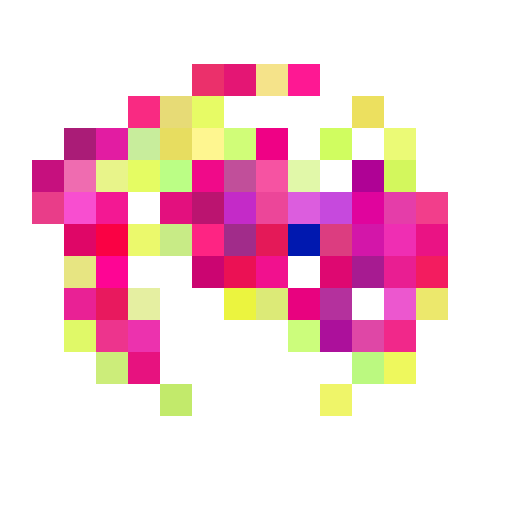

Computation for population 63
Mutations are done
Crossovers are done
Fitness for the first element is -30851.98476185343
Computation finished for population 63


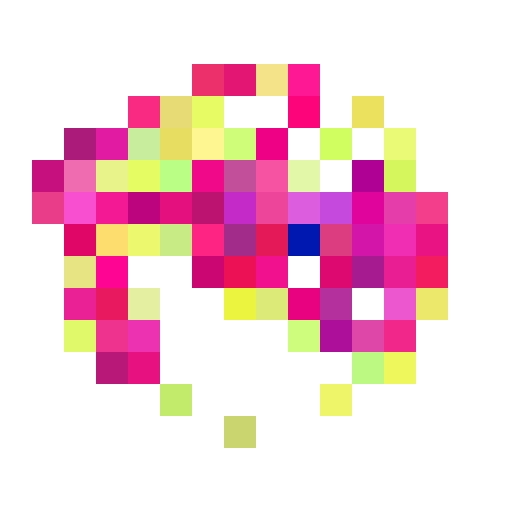

Computation for population 64
Mutations are done
Crossovers are done
Fitness for the first element is -30793.96562894524
Computation finished for population 64


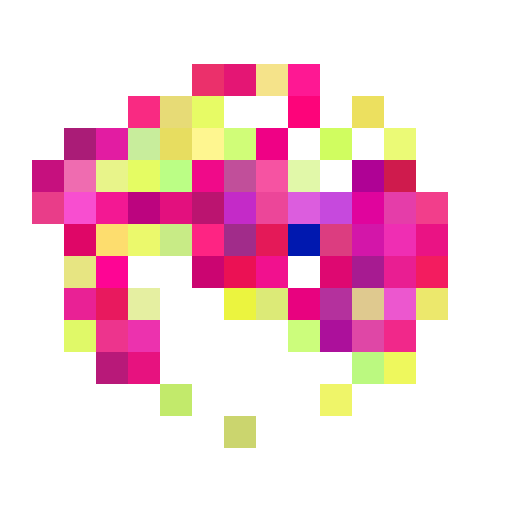

Computation for population 65
Mutations are done
Crossovers are done
Fitness for the first element is -30764.520887398234
Computation finished for population 65


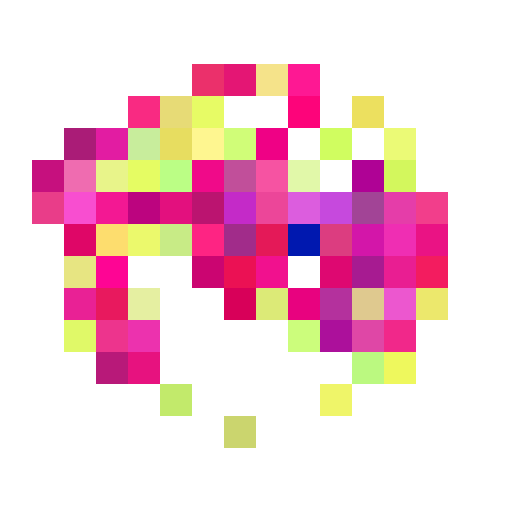

Computation for population 66
Mutations are done
Crossovers are done
Fitness for the first element is -30664.734244646625
Computation finished for population 66


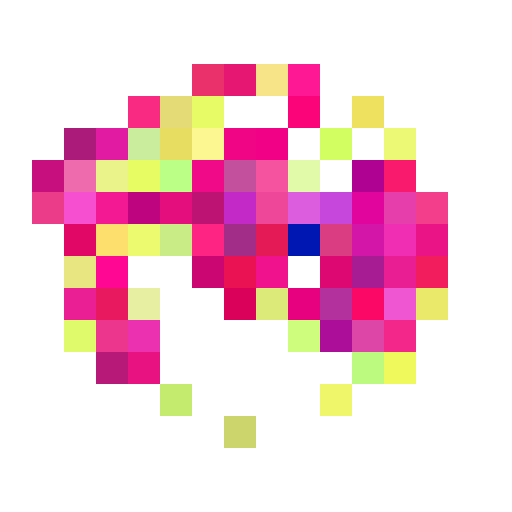

Computation for population 67
Mutations are done
Crossovers are done
Fitness for the first element is -30589.866770663673
Computation finished for population 67


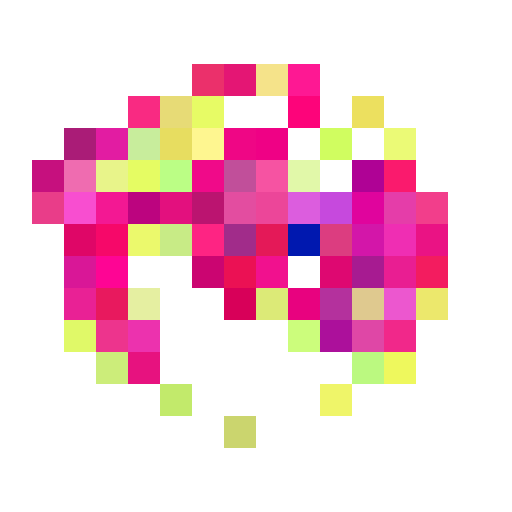

Computation for population 68
Mutations are done
Crossovers are done
Fitness for the first element is -30524.89677677088
Computation finished for population 68


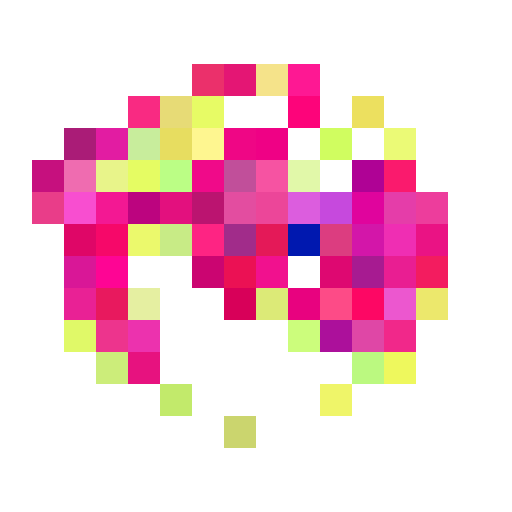

Computation for population 69
Mutations are done
Crossovers are done
Fitness for the first element is -30490.607402464808
Computation finished for population 69


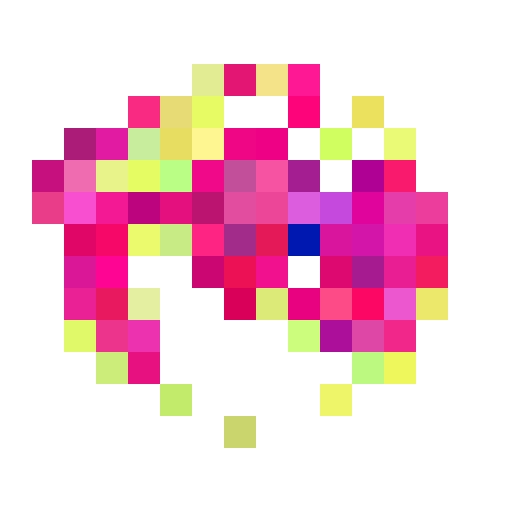

Computation for population 70
Mutations are done
Crossovers are done
Fitness for the first element is -30415.596189923308
Computation finished for population 70


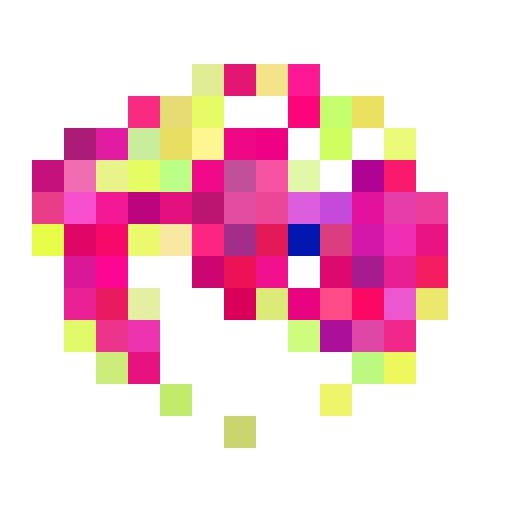

Computation for population 71
Mutations are done
Crossovers are done
Fitness for the first element is -30328.79060959863
Computation finished for population 71


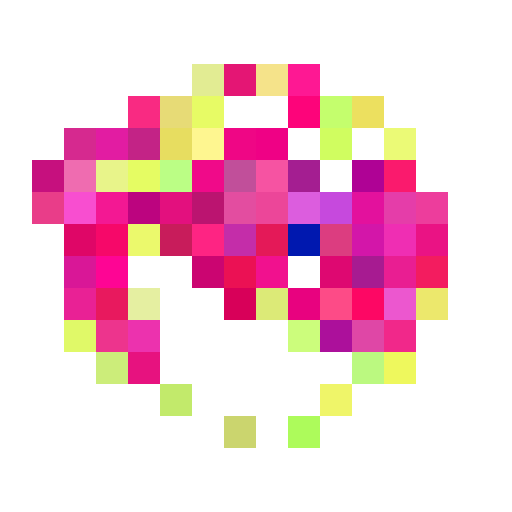

Computation for population 72
Mutations are done
Crossovers are done
Fitness for the first element is -30225.49601440599
Computation finished for population 72


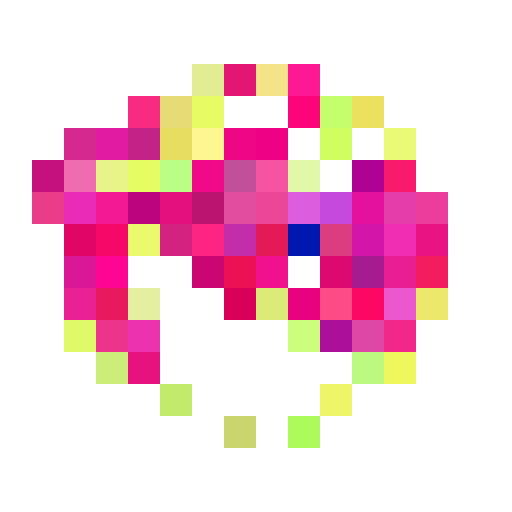

Computation for population 73
Mutations are done
Crossovers are done
Fitness for the first element is -30140.620292305503
Computation finished for population 73


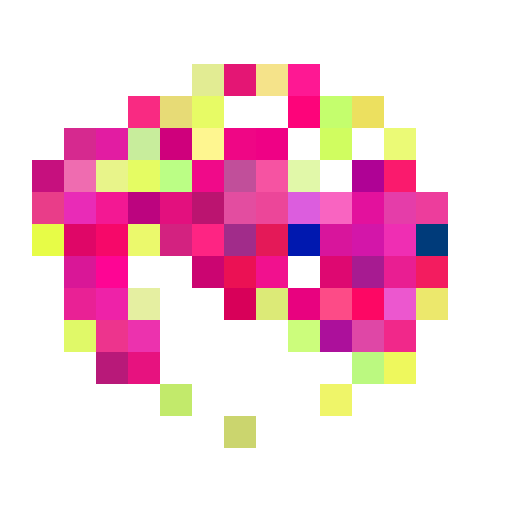

Computation for population 74
Mutations are done
Crossovers are done
Fitness for the first element is -30106.31128309793
Computation finished for population 74


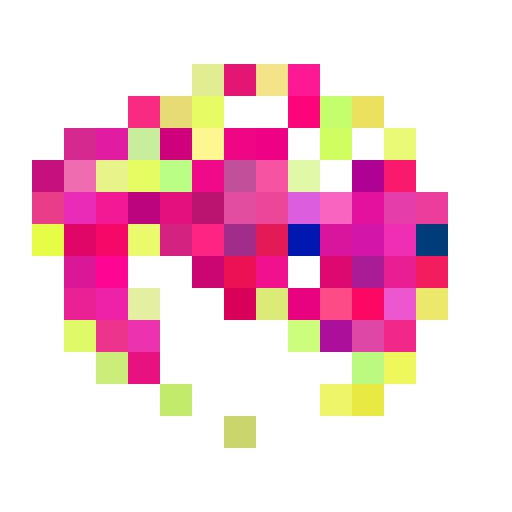

Computation for population 75
Mutations are done
Crossovers are done
Fitness for the first element is -30019.678571803048
Computation finished for population 75


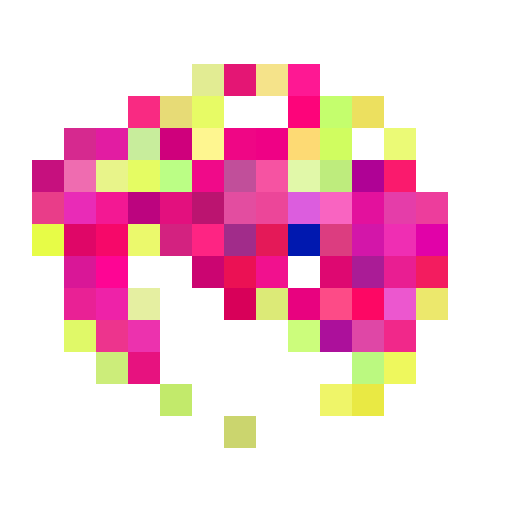

Computation for population 76
Mutations are done
Crossovers are done
Fitness for the first element is -29959.8949986295
Computation finished for population 76


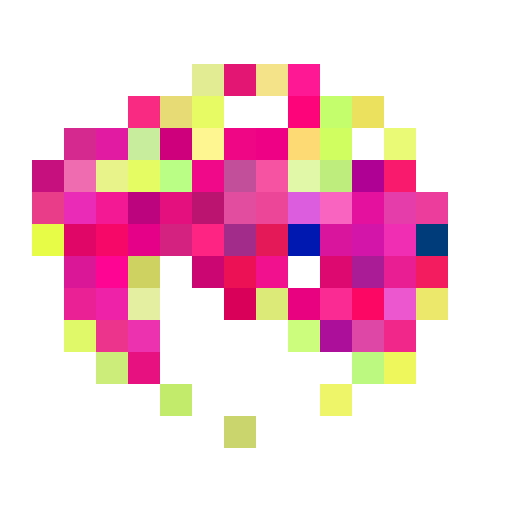

Computation for population 77
Mutations are done
Crossovers are done
Fitness for the first element is -29862.399559449812
Computation finished for population 77


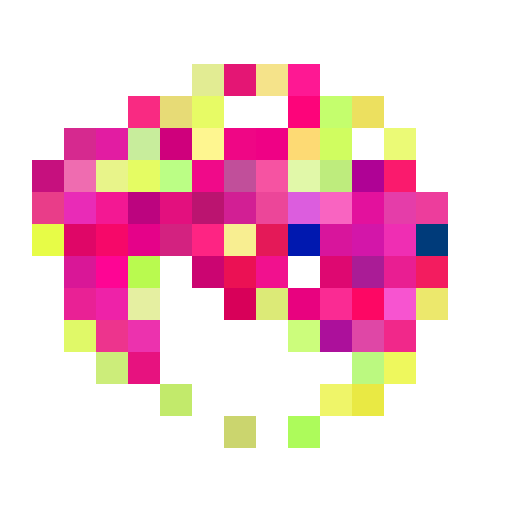

Computation for population 78
Mutations are done
Crossovers are done
Fitness for the first element is -29829.22228955793
Computation finished for population 78


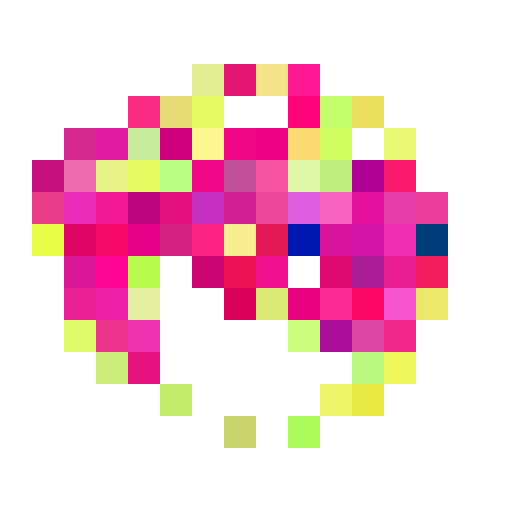

Computation for population 79
Mutations are done
Crossovers are done
Fitness for the first element is -29740.03709336322
Computation finished for population 79


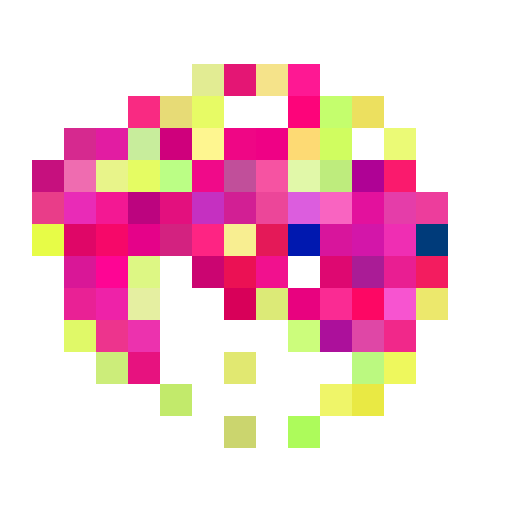

Computation for population 80
Mutations are done
Crossovers are done
Fitness for the first element is -29707.695330010785
Computation finished for population 80


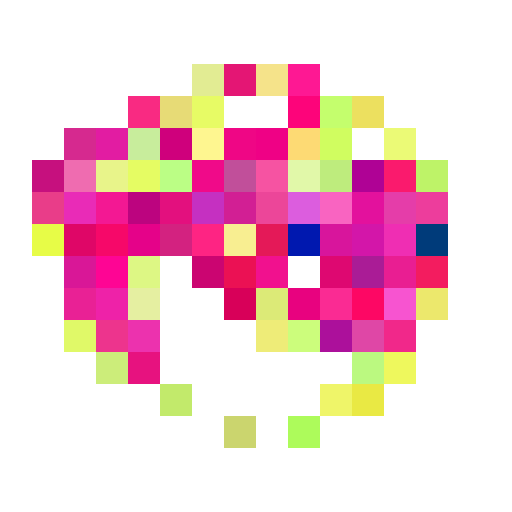

Computation for population 81
Mutations are done
Crossovers are done
Fitness for the first element is -29642.420574993394
Computation finished for population 81


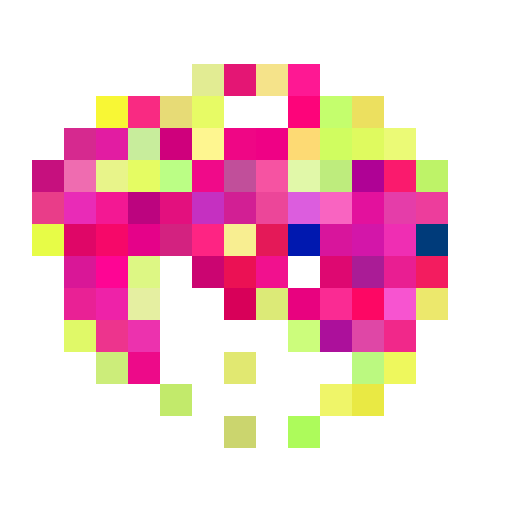

Computation for population 82
Mutations are done
Crossovers are done
Fitness for the first element is -29578.539590397293
Computation finished for population 82


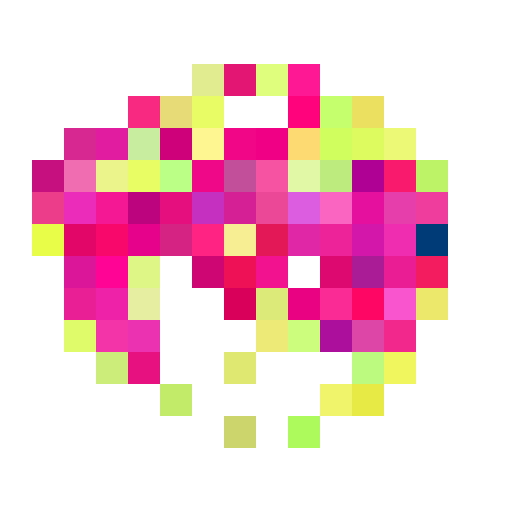

Computation for population 83
Mutations are done
Crossovers are done
Fitness for the first element is -29525.393012658213
Computation finished for population 83


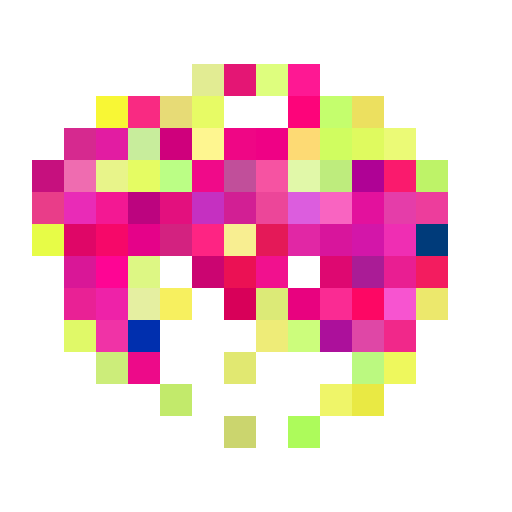

Computation for population 84
Mutations are done
Crossovers are done
Fitness for the first element is -29507.180583123114
Computation finished for population 84


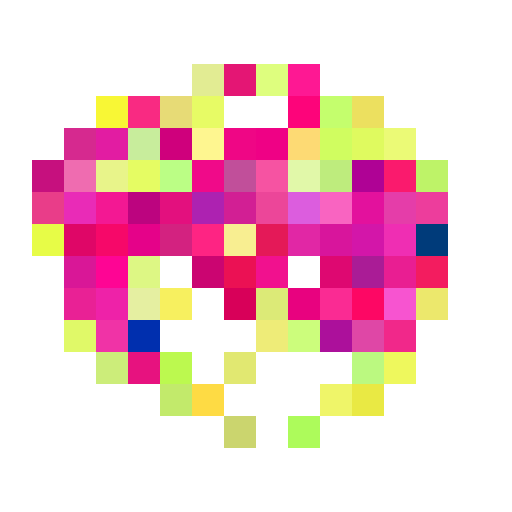

Computation for population 85
Mutations are done
Crossovers are done
Fitness for the first element is -29458.997698843254
Computation finished for population 85


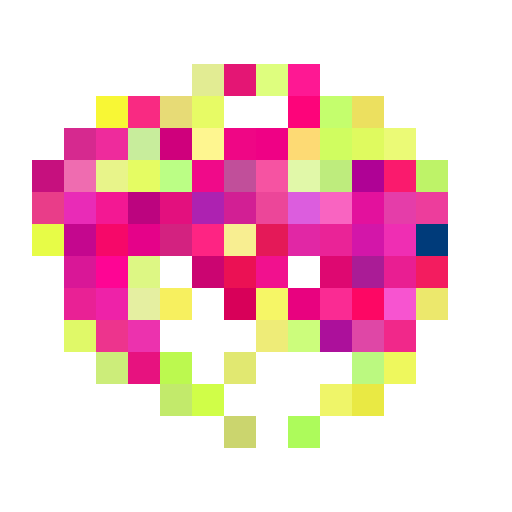

Computation for population 86
Mutations are done
Crossovers are done
Fitness for the first element is -29366.078755771065
Computation finished for population 86


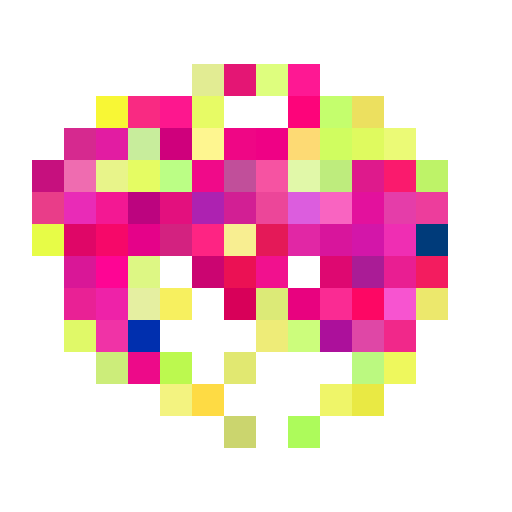

Computation for population 87
Mutations are done
Crossovers are done
Fitness for the first element is -29303.2727942899
Computation finished for population 87


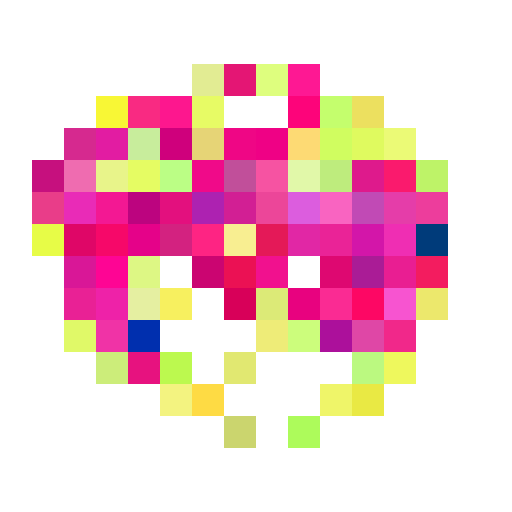

Computation for population 88
Mutations are done
Crossovers are done
Fitness for the first element is -29207.804102725473
Computation finished for population 88


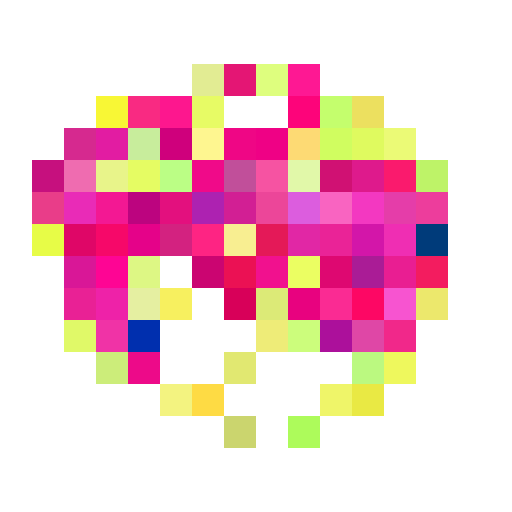

Computation for population 89
Mutations are done
Crossovers are done
Fitness for the first element is -29176.64340287311
Computation finished for population 89


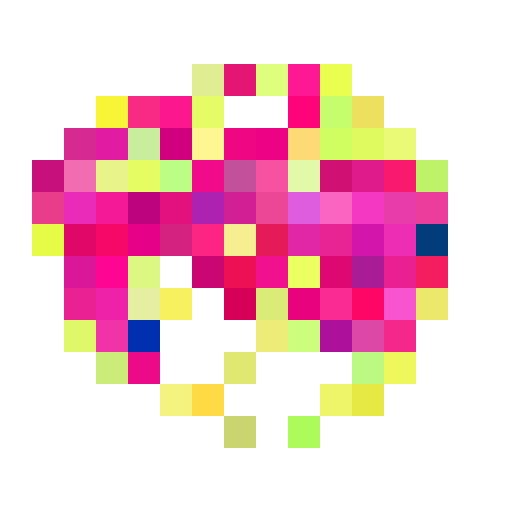

Computation for population 90
Mutations are done
Crossovers are done
Fitness for the first element is -29149.683590342196
Computation finished for population 90


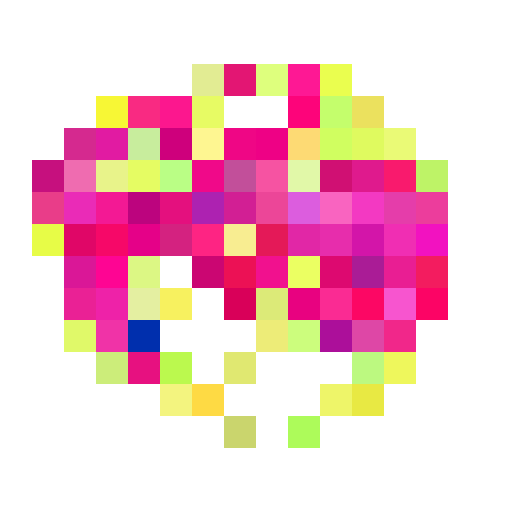

Computation for population 91
Mutations are done
Crossovers are done
Fitness for the first element is -29087.35400066678
Computation finished for population 91


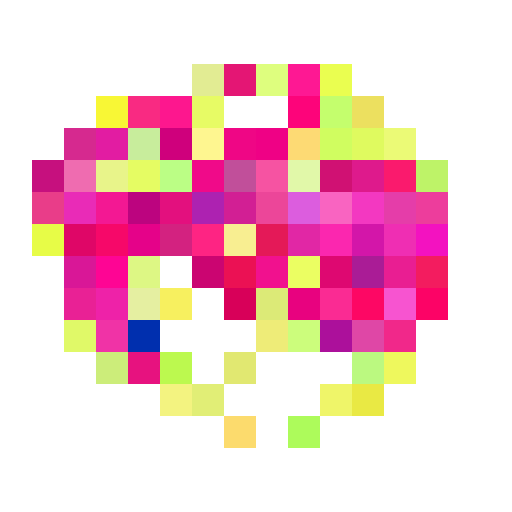

Computation for population 92
Mutations are done
Crossovers are done
Fitness for the first element is -29034.143762129443
Computation finished for population 92


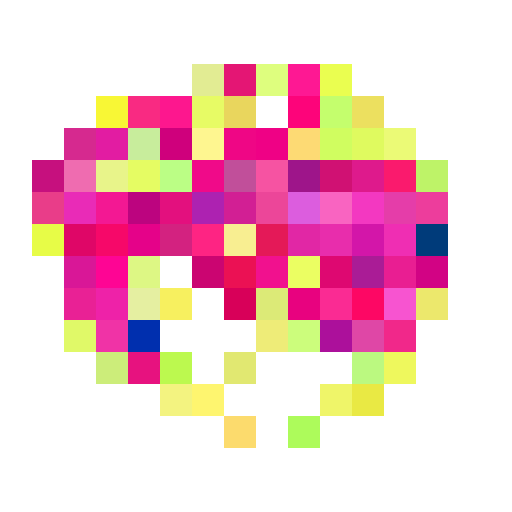

Computation for population 93
Mutations are done
Crossovers are done
Fitness for the first element is -28963.46939176545
Computation finished for population 93


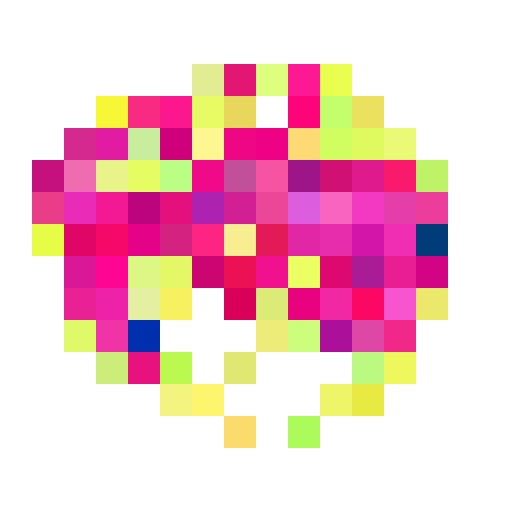

Computation for population 94
Mutations are done
Crossovers are done
Fitness for the first element is -28936.09797233704
Computation finished for population 94


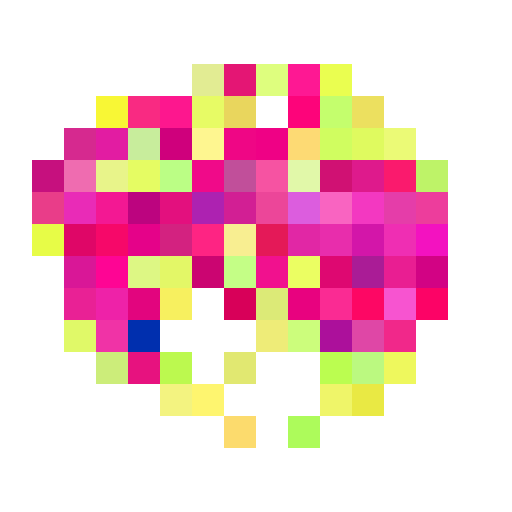

Computation for population 95
Mutations are done
Crossovers are done
Fitness for the first element is -28889.688372696433
Computation finished for population 95


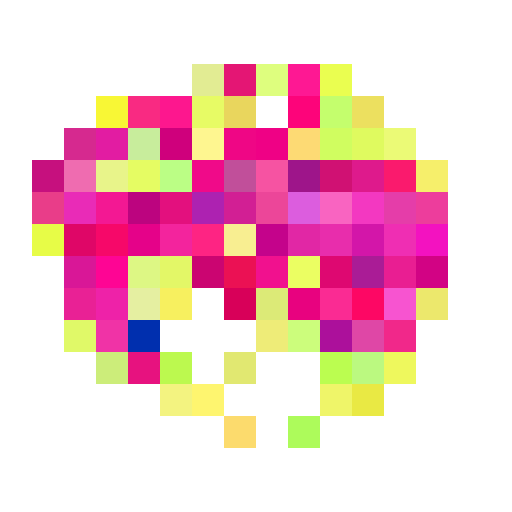

Computation for population 96
Mutations are done
Crossovers are done
Fitness for the first element is -28834.545487247036
Computation finished for population 96


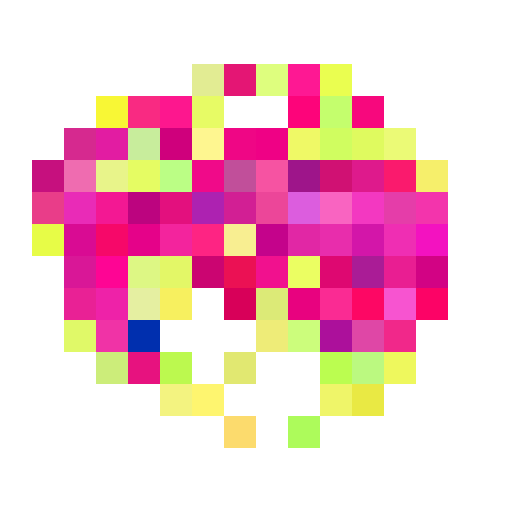

Computation for population 97
Mutations are done
Crossovers are done
Fitness for the first element is -28765.517237015036
Computation finished for population 97


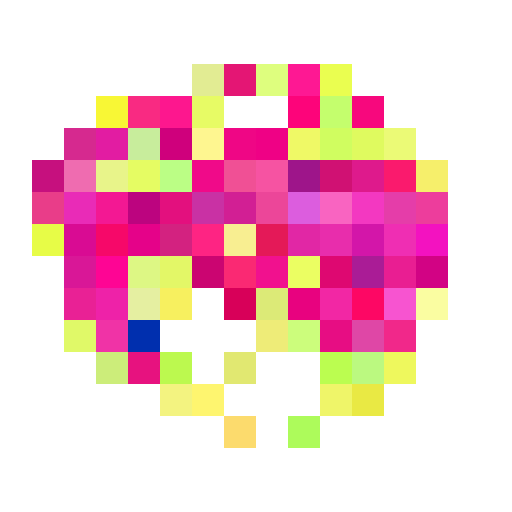

Computation for population 98
Mutations are done
Crossovers are done
Fitness for the first element is -28702.24397165452
Computation finished for population 98


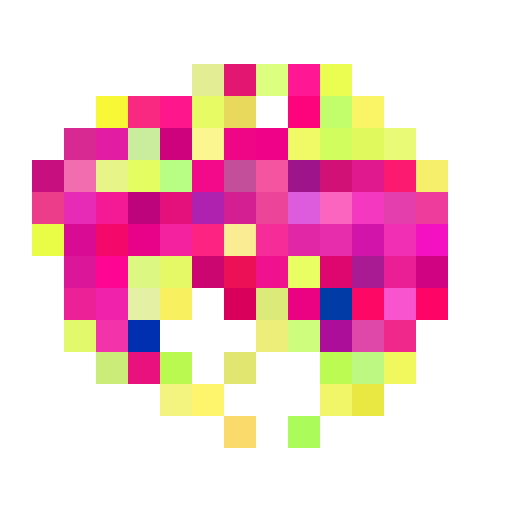

Computation for population 99
Mutations are done
Crossovers are done
Fitness for the first element is -28613.570536027953
Computation finished for population 99


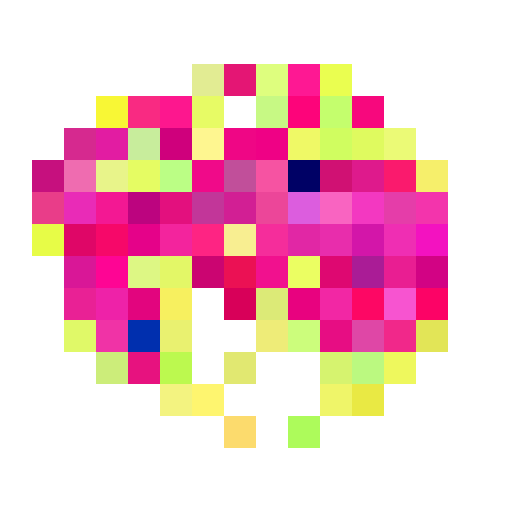

Computation for population 100
Mutations are done
Crossovers are done
Fitness for the first element is -28520.04616812046
Computation finished for population 100


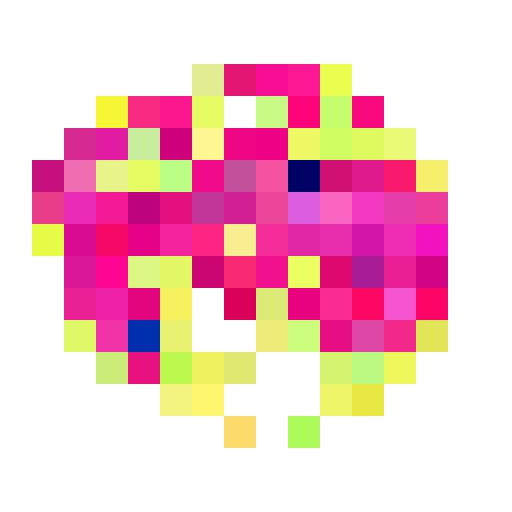

Computation for population 101
Mutations are done
Crossovers are done
Fitness for the first element is -28446.343376670407
Computation finished for population 101


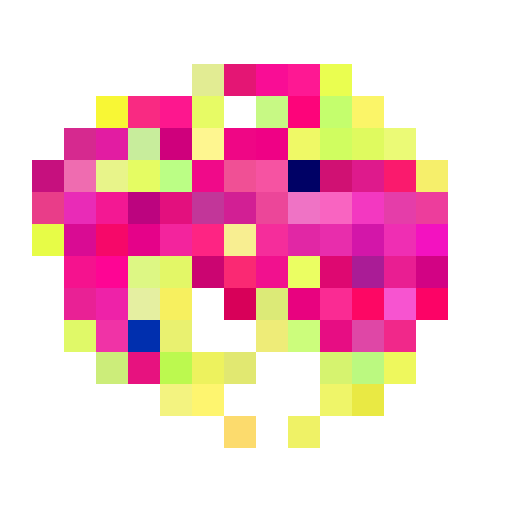

Computation for population 102
Mutations are done
Crossovers are done
Fitness for the first element is -28381.35893620492
Computation finished for population 102


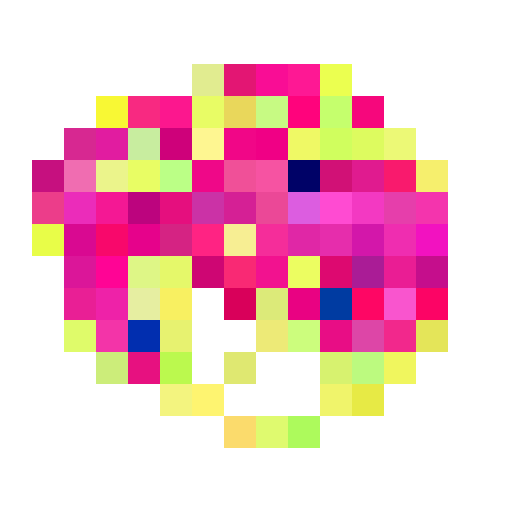

Computation for population 103
Mutations are done
Crossovers are done
Fitness for the first element is -28362.8939293472
Computation finished for population 103


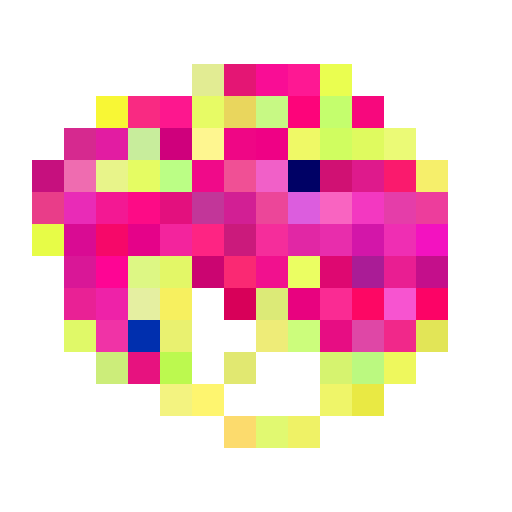

Computation for population 104
Mutations are done
Crossovers are done
Fitness for the first element is -28299.61821186966
Computation finished for population 104


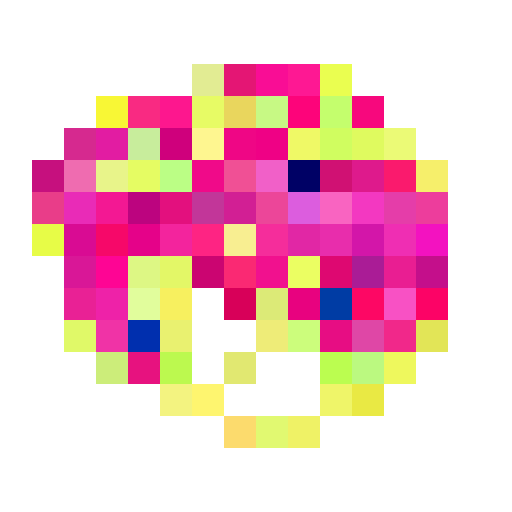

Computation for population 105
Mutations are done
Crossovers are done
Fitness for the first element is -28193.27952997771
Computation finished for population 105


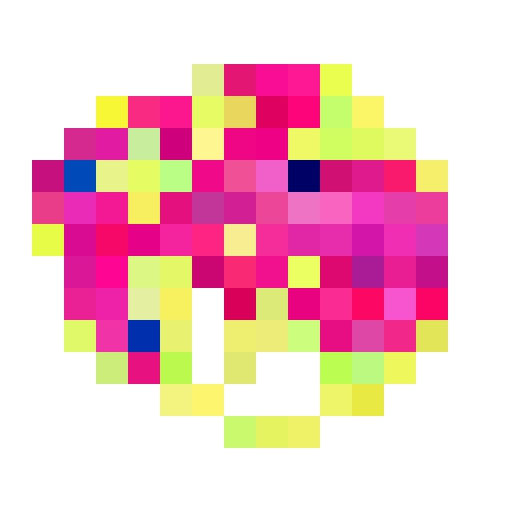

Computation for population 106
Mutations are done
Crossovers are done
Fitness for the first element is -28140.55718483703
Computation finished for population 106


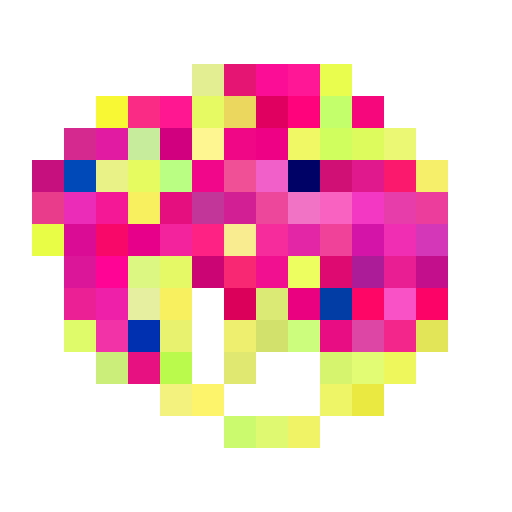

Computation for population 107
Mutations are done
Crossovers are done
Fitness for the first element is -28103.716343625318
Computation finished for population 107


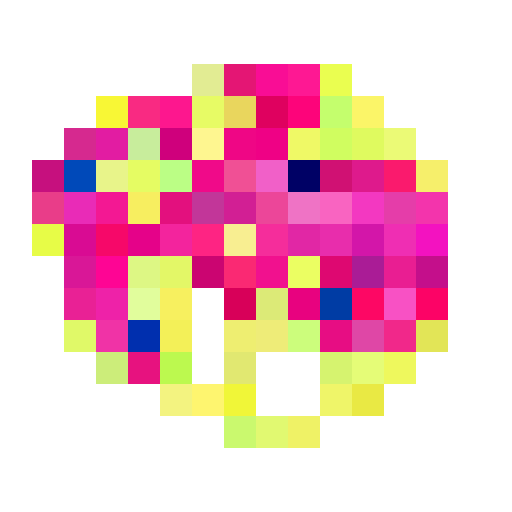

Computation for population 108
Mutations are done
Crossovers are done
Fitness for the first element is -28035.504537621033
Computation finished for population 108


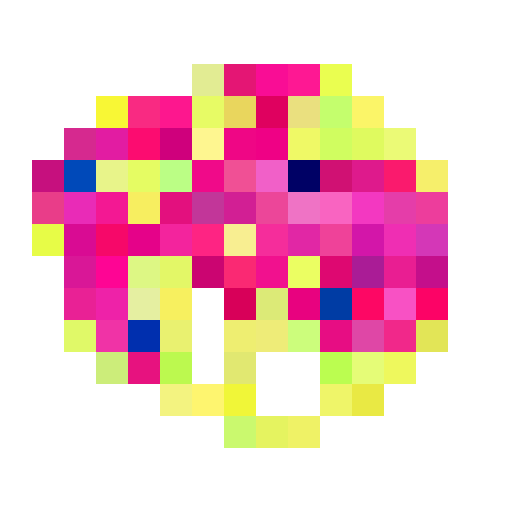

Computation for population 109
Mutations are done
Crossovers are done
Fitness for the first element is -27994.544891352878
Computation finished for population 109


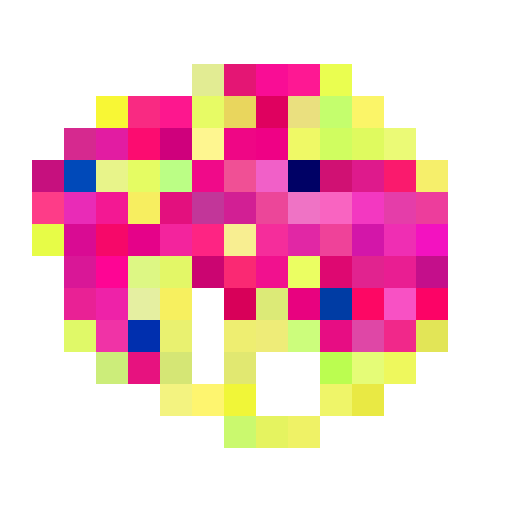

Computation for population 110
Mutations are done
Crossovers are done
Fitness for the first element is -27951.67628644412
Computation finished for population 110


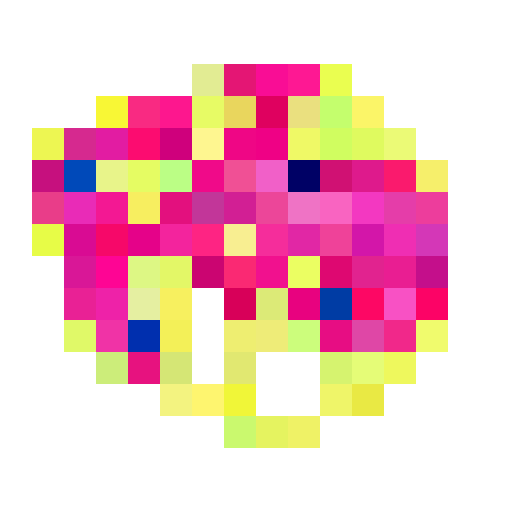

Computation for population 111
Mutations are done
Crossovers are done
Fitness for the first element is -27900.52953103694
Computation finished for population 111


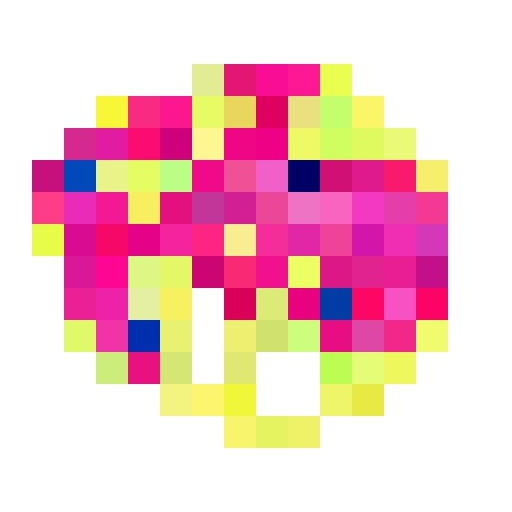

Computation for population 112
Mutations are done
Crossovers are done
Fitness for the first element is -27877.35356895375
Computation finished for population 112


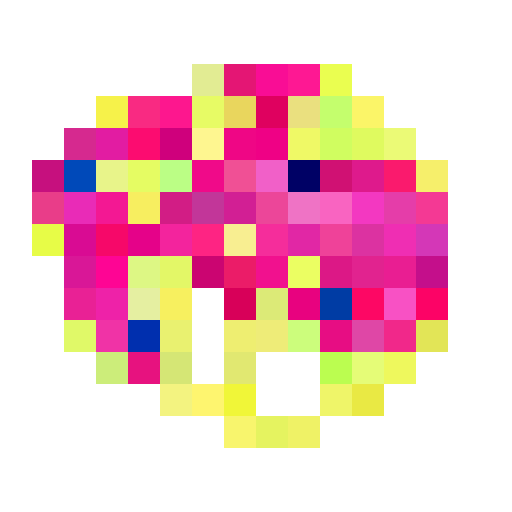

Computation for population 113
Mutations are done
Crossovers are done
Fitness for the first element is -27848.320583197717
Computation finished for population 113


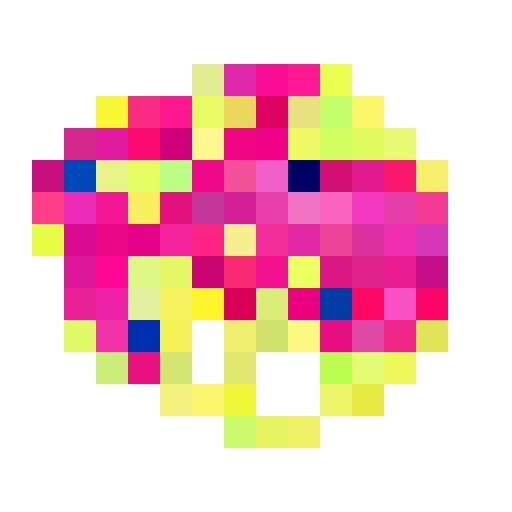

Computation for population 114
Mutations are done
Crossovers are done
Fitness for the first element is -27805.834644215196
Computation finished for population 114


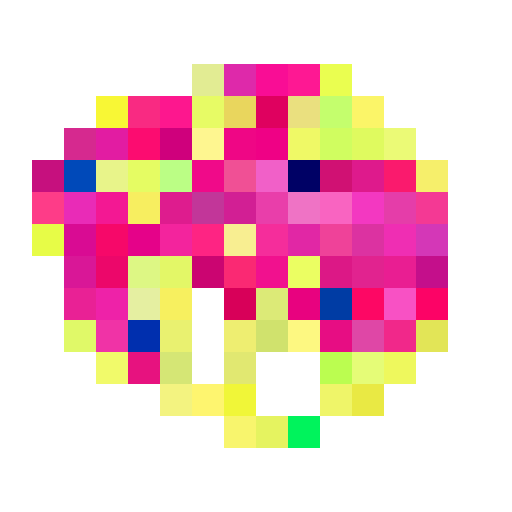

Computation for population 115
Mutations are done
Crossovers are done
Fitness for the first element is -27744.825116207714
Computation finished for population 115


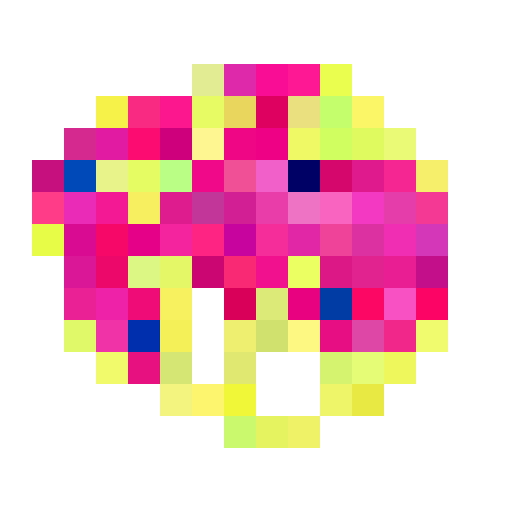

Computation for population 116
Mutations are done
Crossovers are done
Fitness for the first element is -27739.336764822787
Computation finished for population 116


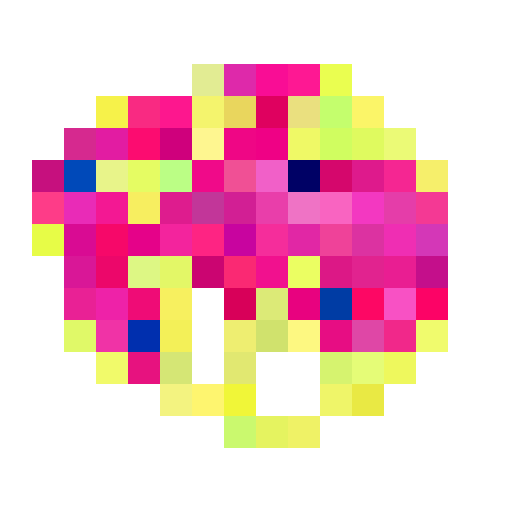

Computation for population 117
Mutations are done
Crossovers are done
Fitness for the first element is -27679.794397566973
Computation finished for population 117


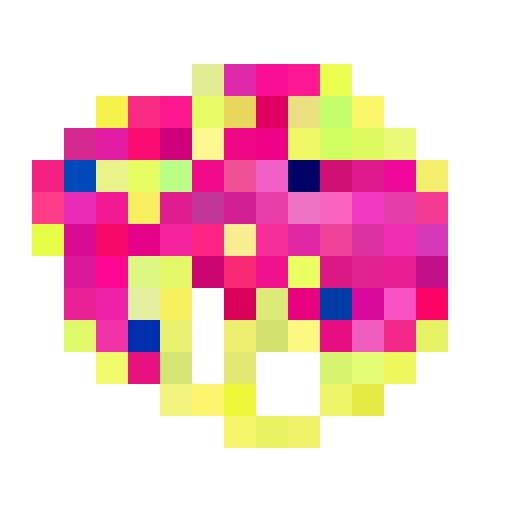

Computation for population 118
Mutations are done
Crossovers are done
Fitness for the first element is -27633.428031797117
Computation finished for population 118


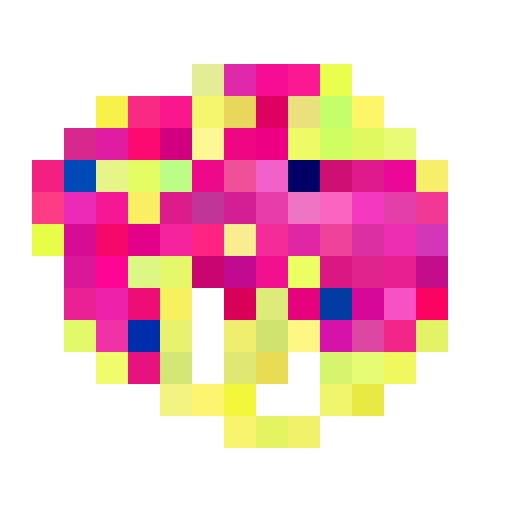

Computation for population 119
Mutations are done
Crossovers are done
Fitness for the first element is -27589.121806081803
Computation finished for population 119


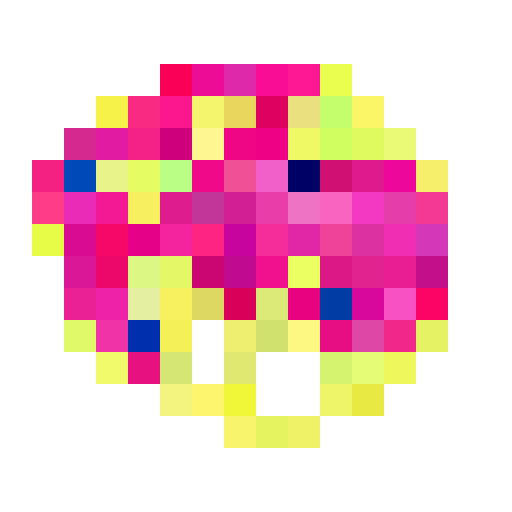

Computation for population 120
Mutations are done
Crossovers are done
Fitness for the first element is -27549.714977900156
Computation finished for population 120


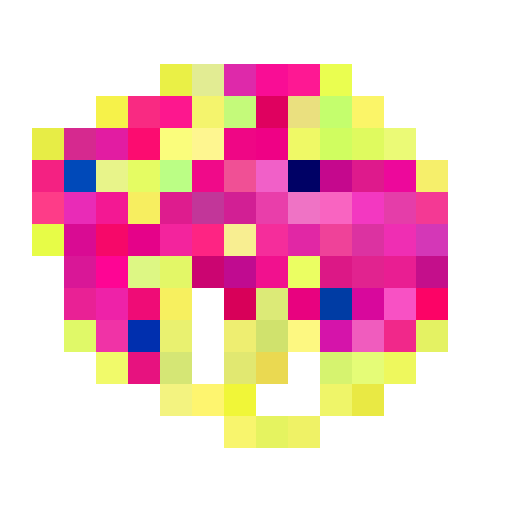

Computation for population 121
Mutations are done
Crossovers are done
Fitness for the first element is -27500.549875732788
Computation finished for population 121


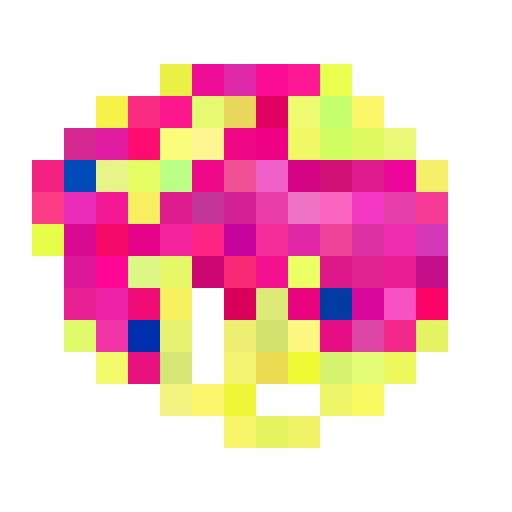

Computation for population 122
Mutations are done
Crossovers are done
Fitness for the first element is -27466.41662068985
Computation finished for population 122


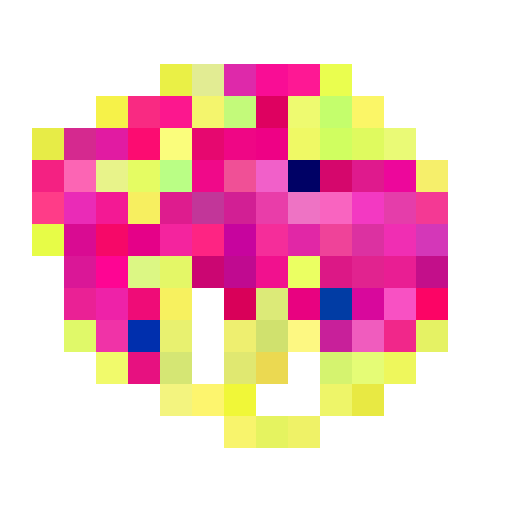

Computation for population 123
Mutations are done
Crossovers are done
Fitness for the first element is -27412.98225938641
Computation finished for population 123


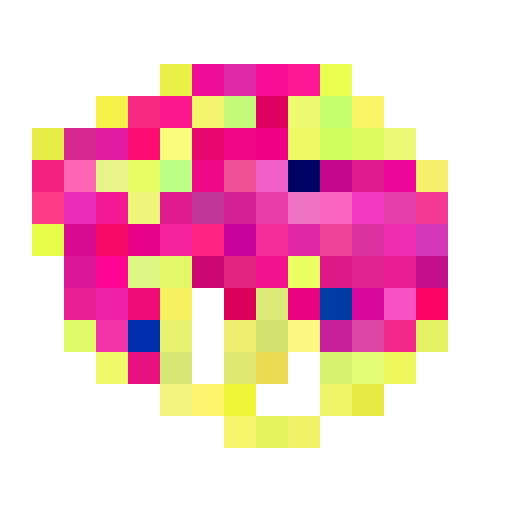

Computation for population 124
Mutations are done
Crossovers are done
Fitness for the first element is -27347.18215110875
Computation finished for population 124


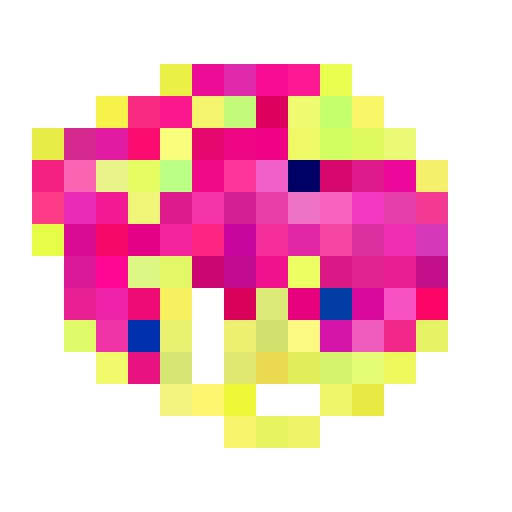

Computation for population 125
Mutations are done
Crossovers are done
Fitness for the first element is -27292.899137765184
Computation finished for population 125


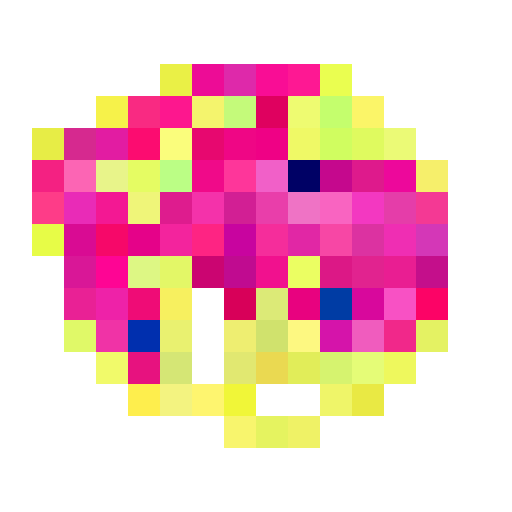

Computation for population 126
Mutations are done
Crossovers are done
Fitness for the first element is -27247.05336534854
Computation finished for population 126


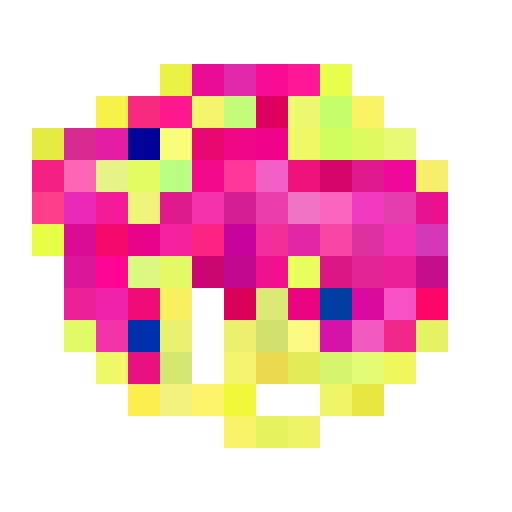

Computation for population 127
Mutations are done
Crossovers are done
Fitness for the first element is -27217.092231418228
Computation finished for population 127


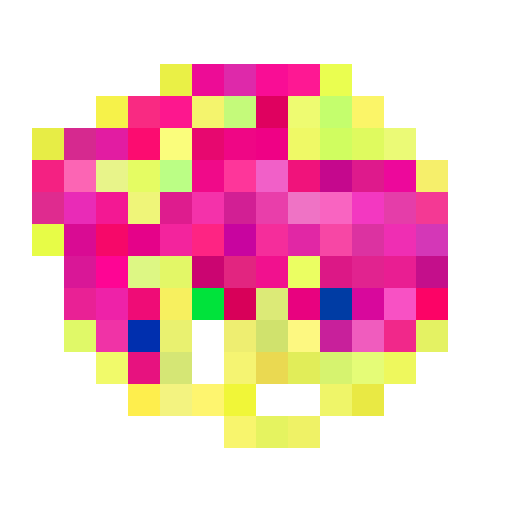

Computation for population 128
Mutations are done
Crossovers are done
Fitness for the first element is -27167.273145913972
Computation finished for population 128


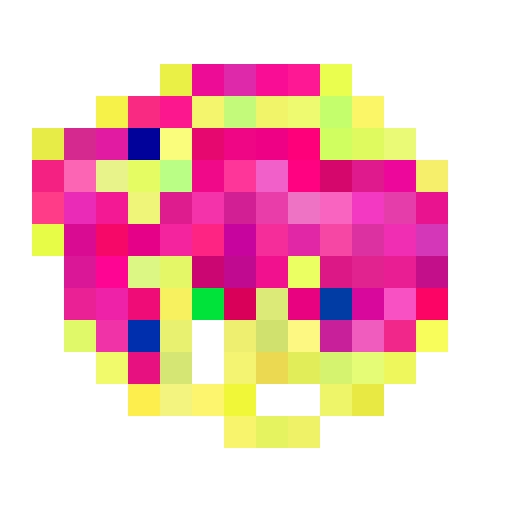

Computation for population 129
Mutations are done
Crossovers are done
Fitness for the first element is -27119.364766965373
Computation finished for population 129


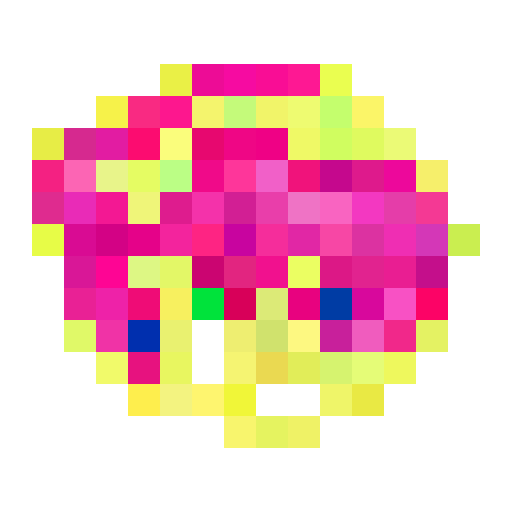

Computation for population 130
Mutations are done
Crossovers are done
Fitness for the first element is -27083.300263001798
Computation finished for population 130


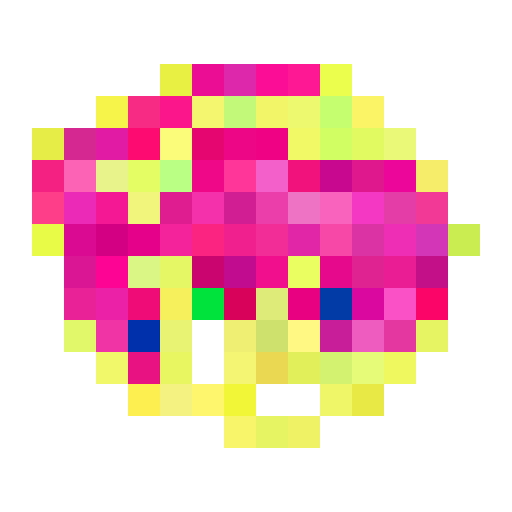

Computation for population 131
Mutations are done
Crossovers are done
Fitness for the first element is -27048.197209270078
Computation finished for population 131


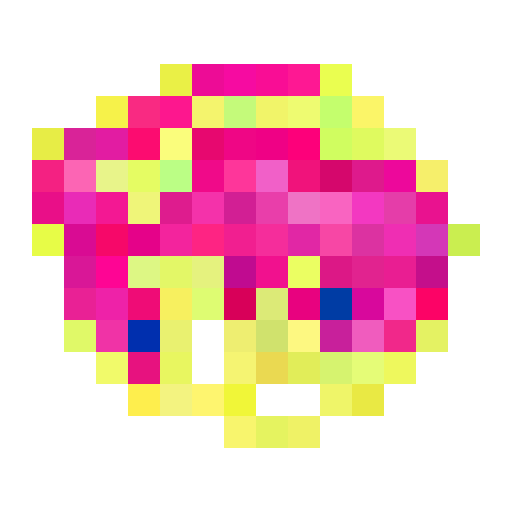

Computation for population 132
Mutations are done
Crossovers are done
Fitness for the first element is -27034.369411962485
Computation finished for population 132


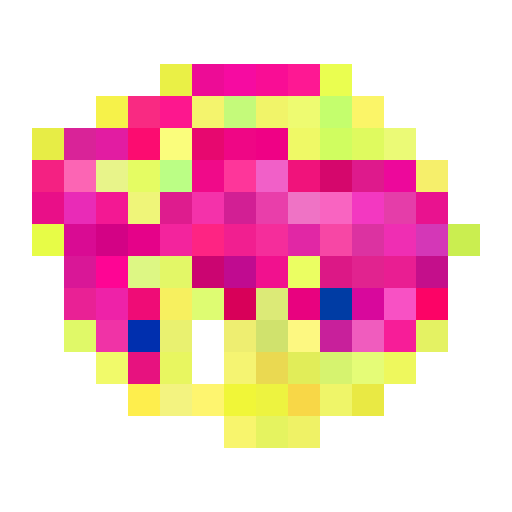

Computation for population 133
Mutations are done
Crossovers are done
Fitness for the first element is -26987.95935138483
Computation finished for population 133


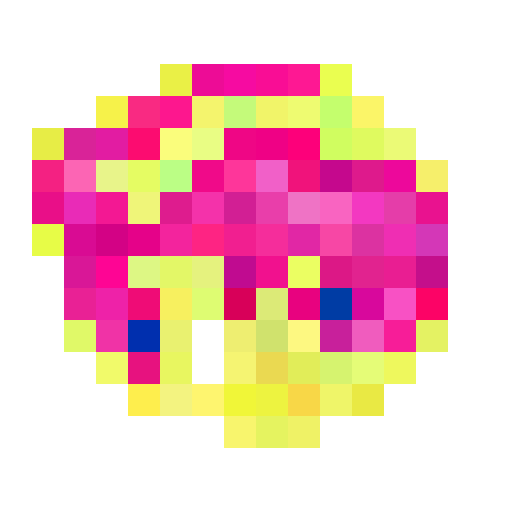

Computation for population 134
Mutations are done
Crossovers are done
Fitness for the first element is -26969.517739079958
Computation finished for population 134


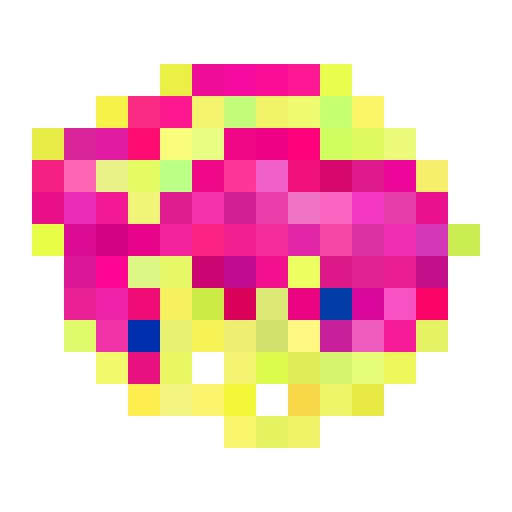

Computation for population 135


In [ ]:
population = generate_initial_population()
population_fitness = list(map(fitness, population))
print(population_fitness)
display.display(Image.fromarray(population[0], 'RGB'))

for e in range(epoch_number):
    print("Computation for population " + str(e))
    population = generate_population(population)
    print("Fitness for the first element is " + str(fitness(population[0])))
    print("Computation finished for population " + str(e))
    display.display(Image.fromarray(population[0], 'RGB'))
print("All computations are finished")

### Tests

In [ ]:
img1 = np.zeros((512,512,3), dtype=np.uint8)
for cell in [(j, i) for j in range(16) for i in range(16)]:
    color = np.random.randint(0,256, size=3)
    for i in range(32):
        for j in range(32):
            img1[cell[0] * 32 + i][cell[1] * 32 + j] = color

img2 = np.zeros((512,512,3), dtype=np.uint8)
for cell in [(j, i) for j in range(16) for i in range(16)]:
    color = np.random.randint(0,256, size=3)
    for i in range(32):
        for j in range(32):
            img2[cell[0] * 32 + i][cell[1] * 32 + j] = color

img3, img4 = crossover(img1, img2)

w = 10
h = 10
fig = plt.figure(figsize=(9, 9))
columns = 2
rows = 2
ax = []
ax.append( fig.add_subplot(rows, columns, 1) )
plt.imshow(img1)
ax.append( fig.add_subplot(rows, columns, 2) )
plt.imshow(img2)
ax.append( fig.add_subplot(rows, columns, 3) )
plt.imshow(img3)
# plt.imshow(first_img)
ax.append( fig.add_subplot(rows, columns, 4) )
plt.imshow(img4)
# plt.imshow(second_img)
plt.show()


In [ ]:
img1 = np.zeros((512,512,3), dtype=np.uint8)
for cell in [(j, i) for j in range(16) for i in range(16)]:
    color = np.random.randint(0,256, size=3)
    for i in range(32):
        for j in range(32):
            img1[cell[0] * 32 + i][cell[1] * 32 + j] = color
            
img2 = mutation(img1)

w = 10
h = 10
fig = plt.figure(figsize=(9, 9))
columns = 1
rows = 2
ax = []
ax.append( fig.add_subplot(rows, columns, 1) )
plt.imshow(img1)
ax.append( fig.add_subplot(rows, columns, 2) )
plt.imshow(img2)
plt.show()